<a href="https://colab.research.google.com/github/purnachand1186/car_price_analysis/blob/main/prompt_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](https://github.com/purnachand1186/car_price_analysis/blob/main/images/kurt.jpeg?raw=1)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Business Objective**: Identify the key factors that influence used car prices ,and below are some of the key business aspects.
1. *Cost*: estimate the price of a used car based on the attributes provided for cars in the dataset more precisely try to answer the below business questions
        1) Is the price of a car dependent on the milage driven ?
        2) Is the price of a car dependent on the engine type and /or horsepower ?


2. *Customers*: Understand what customers are looking for in the used cars to provide them with the best options, to acheive that , analyze the exsting customer data to define the patterns depanding on the income, age, status and education.

3. *Data*: Make sure the provided for this analysis is in a shape to use it for the analysis and for future predictions. Make sure the outliers are removed.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Read the data from the provided CSV file understand the data before clearning it up

In [ ]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE


In [ ]:
#import the data
vehicles = pd.read_csv('data/vehicles.csv')
print("Data Size: : " + str(vehicles.shape))

Data Size: : (163141, 18)


In [ ]:
#preview data
vehicles.head()

id                  region    price  year manufacturer model  \
0  7222695916                prescott   6000.0   NaN          NaN   NaN   
1  7218891961            fayetteville  11900.0   NaN          NaN   NaN   
2  7221797935            florida keys  21000.0   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500.0   NaN          NaN   NaN   
4  7210384030              greensboro   4900.0   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163141 entries, 0 to 163140
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            163141 non-null  int64  
 1   region        163140 non-null  object 
 2   price         163140 non-null  float64
 3   year          162394 non-null  float64
 4   manufacturer  155875 non-null  object 
 5   model         161138 non-null  object 
 6   condition     97800 non-null   object 
 7   cylinders     96602 non-null   object 
 8   fuel          162159 non-null  object 
 9   odometer      161094 non-null  float64
 10  title_status  159875 non-null  object 
 11  transmission  162286 non-null  object 
 12  VIN           103028 non-null  object 
 13  drive         112868 non-null  object 
 14  size          46416 non-null   object 
 15  type          129511 non-null  object 
 16  paint_color   115177 non-null  object 
 17  state         163140 non-null  object 
dtypes: f

In [ ]:
# create a data frame with missing values and percentage of missing values for each column
def missing_df(df):
  total_missing_value = df.isnull().sum()
  percent_missing_value = round(total_missing_value*100/len(df),2)
  missing_valus_df = pd.DataFrame({'count': total_missing_value, 'percentage': percent_missing_value})
  return missing_valus_df

missing_data = missing_df(vehicles)
missing_data[missing_data['count']>0]

count  percentage
region             1        0.00
price              1        0.00
year             747        0.46
manufacturer    7266        4.45
model           2003        1.23
condition      65341       40.05
cylinders      66539       40.79
fuel             982        0.60
odometer        2047        1.25
title_status    3266        2.00
transmission     855        0.52
VIN            60113       36.85
drive          50273       30.82
size          116725       71.55
type           33630       20.61
paint_color    47964       29.40
state              1        0.00

**Observation** : From the above table, we can observe that 'Size' attribute has around 72 % empty values, 'cyliders' has around 42 % and 'condition' attribute has around 41% of empty values/

In [ ]:
# find the unique values in each column
unique_vals = vehicles.nunique(axis=0)
unique_vals

id              163141
region             148
price             9457
year               105
manufacturer        41
model            16989
condition            6
cylinders            8
fuel                 5
odometer         56897
title_status         6
transmission         3
VIN              54280
drive                3
size                 4
type                13
paint_color         12
state               24
dtype: int64

In [ ]:
# describe data
pd.options.display.float_format = '{:.2f}'.format
vehicles.describe()

id         price      year    odometer
count     163141.00     163140.00 162394.00   161094.00
mean  7311986871.67      89506.88   2011.14    97319.67
std     18655560.59   12173503.51      9.66   243637.45
min        73131.00          0.00   1900.00        0.00
25%   7309155754.00       5999.00   2008.00    36481.00
50%   7313597162.00      13999.00   2014.00    82224.00
75%   7315527907.00      25999.00   2017.00   130000.00
max   7316989852.00 3024942282.00   2022.00 10000000.00

**Observation** :  From the above table, we can observe that the price column has a maximum price 373,692,8711 which is an outlier similarly the odometer reading of 1 million is possible but more unlikely in real life.


In [ ]:
vehicles.corr(numeric_only=True)

id  price  year  odometer
id        1.00  -0.00 -0.05     -0.00
price    -0.00   1.00 -0.01      0.02
year     -0.05  -0.01  1.00     -0.15
odometer -0.00   0.02 -0.15      1.00

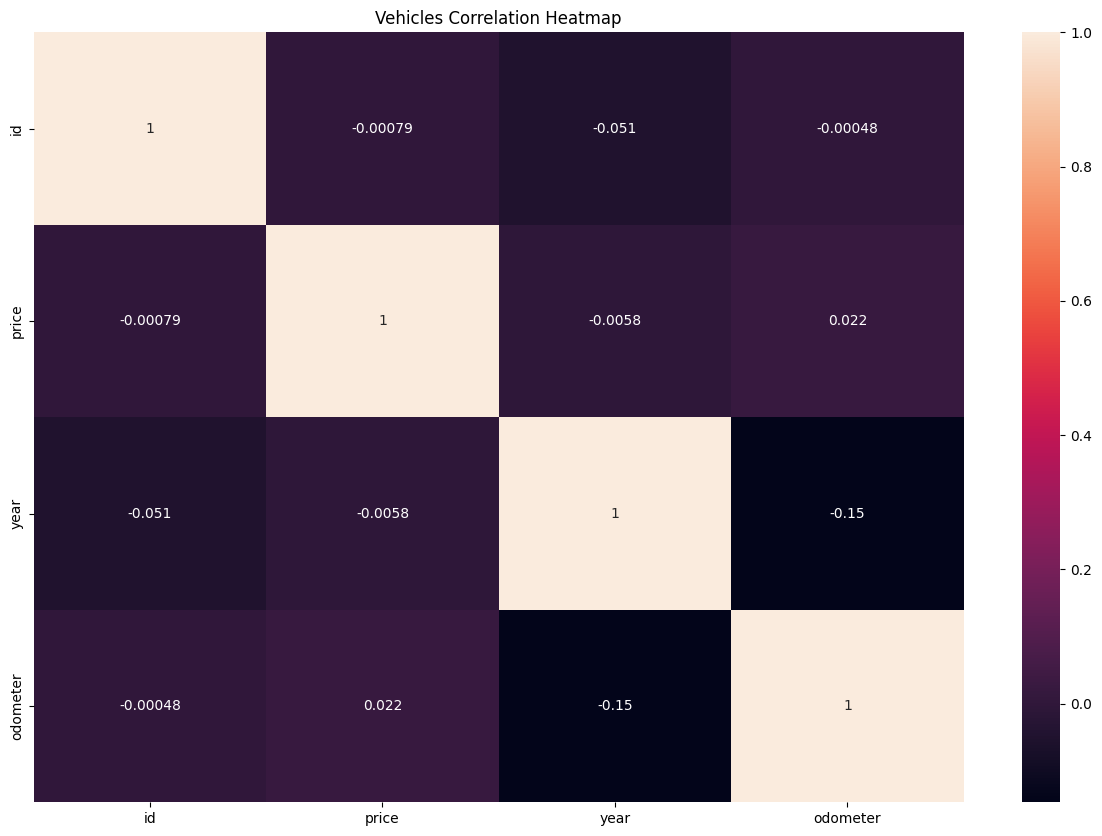

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(vehicles.corr(numeric_only=True), annot=True)
ax.set_title('Vehicles Correlation Heatmap')
plt.show()

**Observation** : From the above Vehicle correlation matrix and the heat map, it is clear that the 'id' attribure does have any relationship with other attributes, and an ideal attribute to delete and it seems odd that the correlation between year and odometer is negtiave, but in real life the older the car and those many miles.

### Time for some Plots

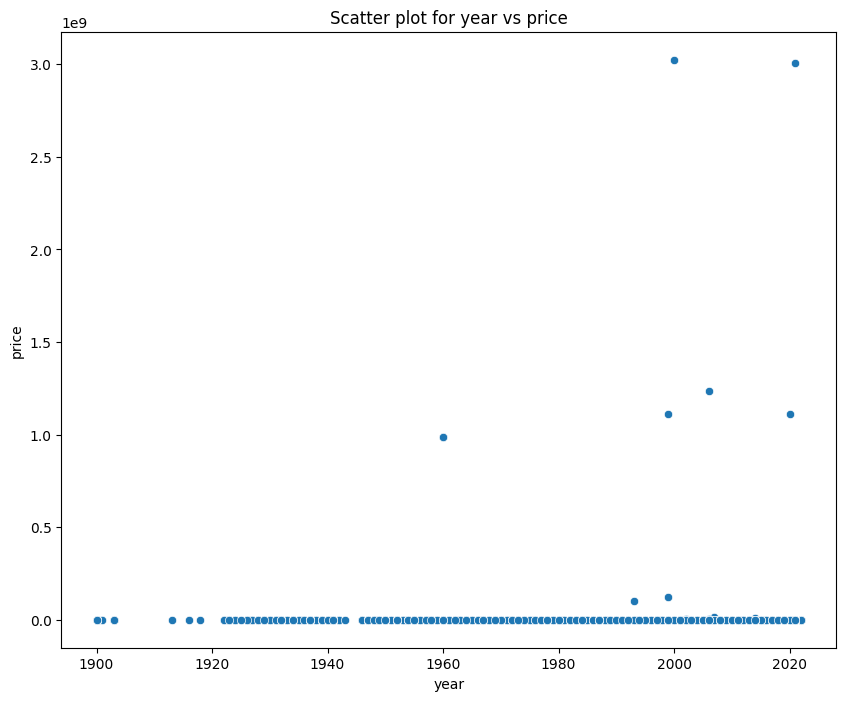

In [ ]:
# draw a plot between price and year

def drawscatterplot(data,x,y):
  fig, ax = plt.subplots(figsize=(10,8))
  fig = sns.scatterplot(data=data, x=x, y=y)
  fig.set_title('Scatter plot for ' + str(x) +' vs ' + str(y))
  fig.set_xlabel(str(x))
  fig.set_ylabel(str(y))
  plt.show()

drawscatterplot(vehicles,'year','price')

In [ ]:
def drawhistplot(data,x,palette):
  fig, ax = plt.subplots(figsize=(10,8))
  fig = sns.histplot(data=data, x=x, palette=palette)
  fig.set_title('Histogram for ' + str(x))

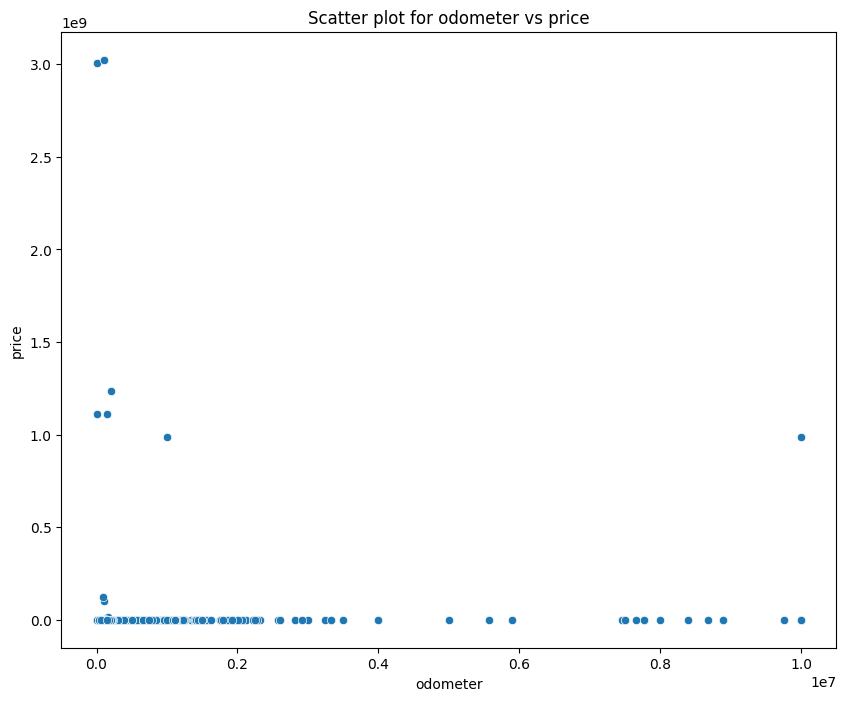

In [ ]:
# draw a plot between price and year
drawscatterplot(vehicles,'odometer','price')

**Observations**: From the above two plots, most of the prices are 0.0 , this could be an issue with NaN values in the price attribute, we will clear this in the data preparation section to re-draw these plots

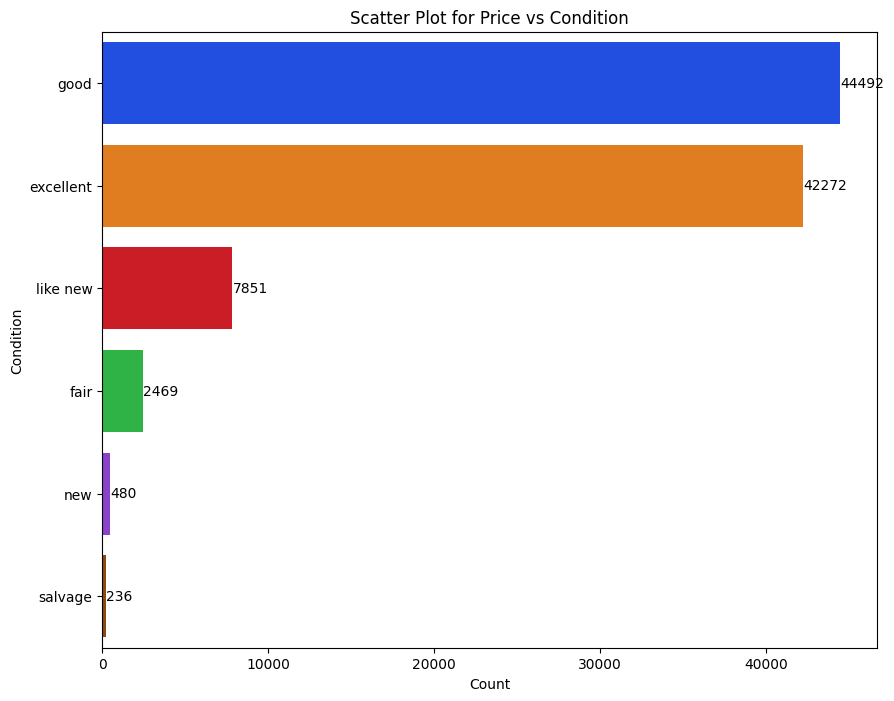

In [ ]:
# draw a plot between condition and year
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.countplot(data=vehicles, y='condition', order=vehicles['condition'].value_counts().index, palette='bright', hue='condition',legend=False)
fig.set_title('Scatter Plot for Price vs Condition')
fig.set_xlabel('Count')
fig.set_ylabel('Condition')
for container in fig.containers:
    fig.bar_label(container)
plt.show()

**Observation**: The provided data has more cars with good condition

<Axes: title={'center': 'Bar Plot for Price vs Condition'}, xlabel='condition', ylabel='price'>

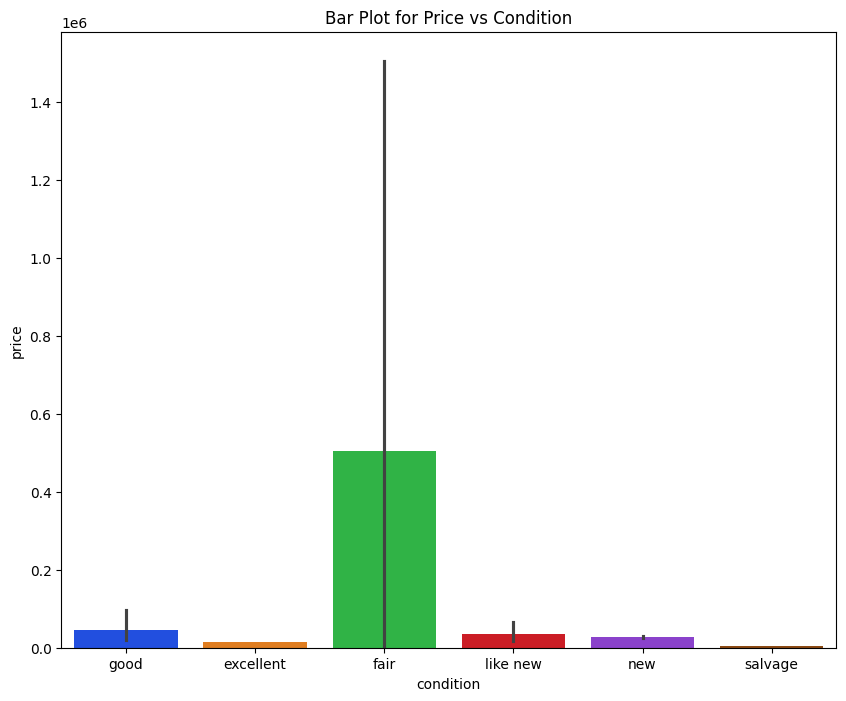

In [ ]:
# generate bar plot between condition, price
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.barplot(data=vehicles, x='condition', y='price', palette='bright', hue='condition',legend=False)
fig.set_title('Bar Plot for Price vs Condition')
fig

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
# keep only those records with price & odometer values greater than 0 and Drop null values from the data frame
clean_vehicles = vehicles[(vehicles['price'] > 0) & (vehicles['odometer'] > 0)].dropna()
clean_vehicles.head()
print("Data Size: : " + str(clean_vehicles.shape))

Data Size: : (12803, 18)


In [ ]:
clean_vehicles.drop_duplicates()

id      region    price    year   manufacturer  \
215     7316482063  birmingham  4000.00 2002.00         toyota   
219     7316429417  birmingham  2500.00 1995.00            bmw   
268     7315946365  birmingham  9000.00 2008.00          mazda   
337     7315354216  birmingham  8950.00 2011.00           ford   
338     7315349921  birmingham  4000.00 1972.00  mercedes-benz   
...            ...         ...      ...     ...            ...   
163050  7316216463  sioux city  9690.00 2011.00         toyota   
163051  7316215241  sioux city 15400.00 2009.00           ford   
163112  7314472203  sioux city 22200.00 2014.00           ford   
163115  7314361956  sioux city 20900.00 2003.00      chevrolet   
163131  7313807986  sioux city 14995.00 2013.00            gmc   

                      model  condition    cylinders fuel  odometer  \
215                    echo  excellent  4 cylinders  gas 155000.00   
219                    525i       fair  6 cylinders  gas 110661.00   
268              miata mx-5  excellent  4 cylinders  gas  56700.00   
337                   f-150  excellent  6 cylinders  gas 164000.00   
338                    benz       fair  6 cylinders  gas  88100.00   
...                     ...        ...          ...  ...       ...   
163050         rav4 limited  excellent  4 cylinders  gas 141255.00   
163051  econoline cargo van  excellent  8 cylinders  gas  54012.00   
163112                f-150       good  8 cylinders  gas 152000.00   
163115             corvette       good  8 cylinders  gas  49446.00   
163131        sierra denali  excellent  6 cylinders  gas 210049.00   

       title_status transmission                VIN drive       size  \
215           clean    automatic  JTDBT123520243495   fwd    compact   
219           clean    automatic  WBAHD6322SGK86772   rwd   mid-size   
268           clean    automatic  JM1NC25F570128735   rwd    compact   
337           clean    automatic  1FTMF1CM6BKD55331   fwd  full-size   
338           clean    automatic        1.14023E+13   rwd  full-size   
...             ...          ...                ...   ...        ...   
163050        clean    automatic  2T3BF4DV8BW158203   4wd  full-size   
163051        clean    automatic  1FTNE24L59DA20273   rwd  full-size   
163112        clean    automatic  1FTFW1EF4EFB85105   4wd  full-size   
163115        clean       manual  1G1YY32G635129822   fwd   mid-size   
163131        clean    automatic  3GTP2XE25DG160517   fwd  full-size   

               type paint_color state  
215           sedan        blue    al  
219           sedan       white    al  
268     convertible       white    al  
337           truck       white    al  
338           coupe      silver    al  
...             ...         ...   ...  
163050          SUV        blue    ia  
163051          van       white    ia  
163112        truck       white    ia  
163115  convertible       black    ia  
163131        truck       white    ia  

[12803 rows x 18 columns]

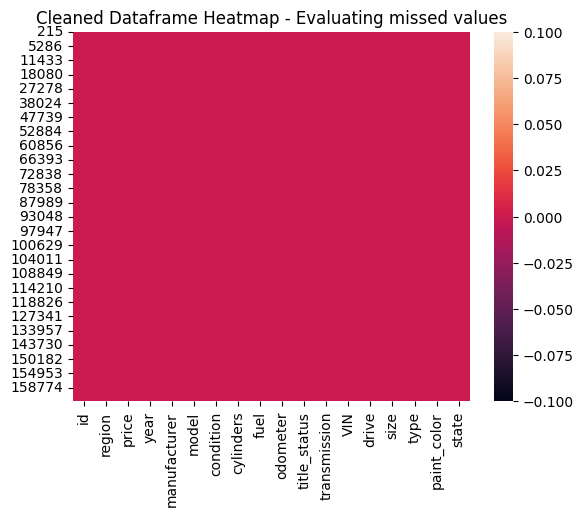

In [ ]:
#making sure there are no numm or empty values
ax = sns.heatmap(
	clean_vehicles.isna()
)
ax.set_title("Cleaned Dataframe Heatmap - Evaluating missed values")
plt.show()

In [ ]:
missing_data = missing_df(clean_vehicles)
missing_data[missing_data['count']>0]

Empty DataFrame
Columns: [count, percentage]
Index: []

In [ ]:
# drop id, vin as they are unique  and 'Size' which has almost 72 % empty values
clean_vehicles.drop(columns=['id','VIN', 'size'], inplace=True)

In [ ]:
clean_vehicles.reset_index(drop=True, inplace=True)

<Axes: title={'center': 'Histogram Plot for Odometer'}, xlabel='odometer', ylabel='Count'>

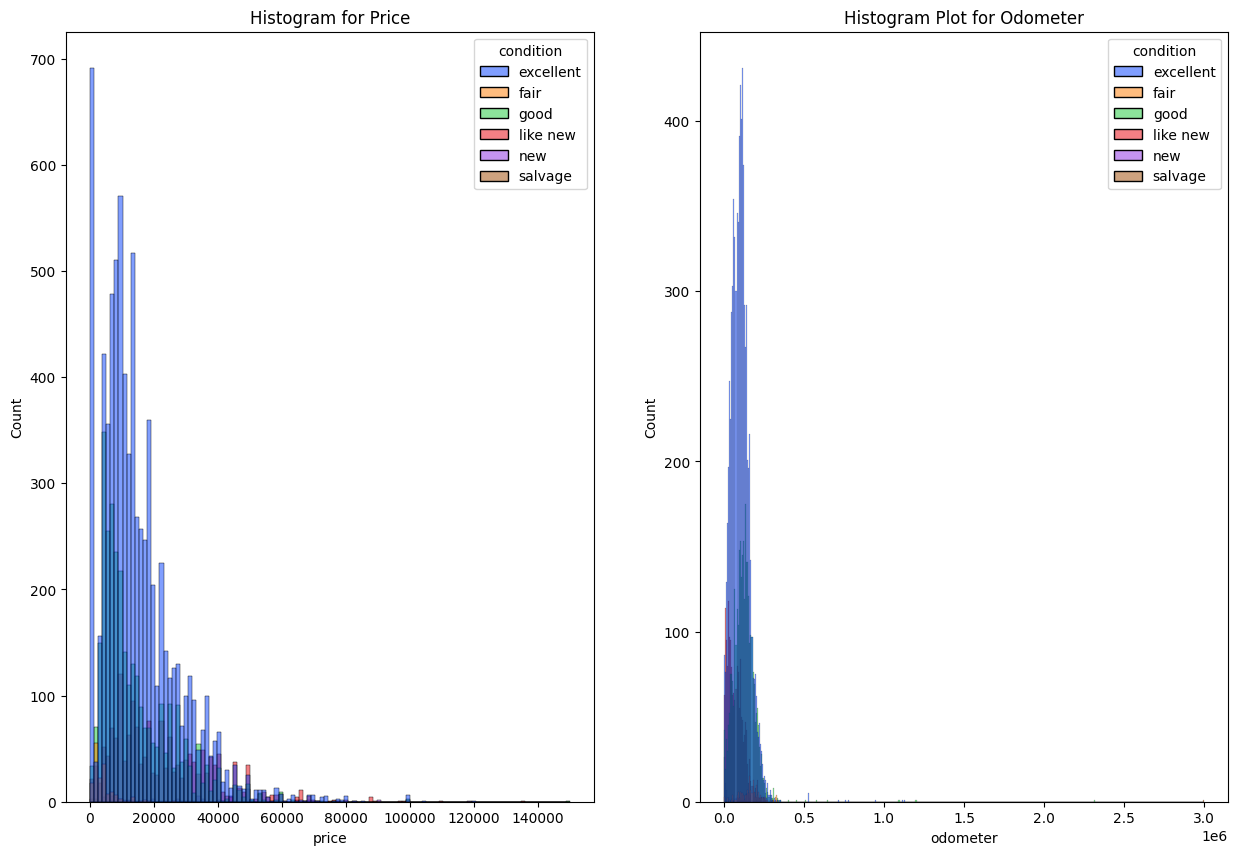

In [ ]:
#drawhistplot(clean_vehicles,'price','viridis')

fig, ax = plt.subplots(1,2,figsize=(15,10))
fig = sns.histplot(data=clean_vehicles, x='price', palette='bright', hue='condition', ax=ax[0])
fig.set_title('Histogram for Price')
fig = sns.histplot(data=clean_vehicles, x='odometer', palette='bright', hue='condition',ax=ax[1])
fig.set_title('Histogram Plot for Odometer')
fig


### Identify Outliers

In this section we will try to indetify outliers from price, odometer, year columns and modify the data

we will use 1.5*IQR to find any value above 3rd quartile or below first quartile and remove them

We will deleting outliers for Price, Odomter, and Year attributes

In [ ]:
def remove_outliers(df, column):
    factor =1.5
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

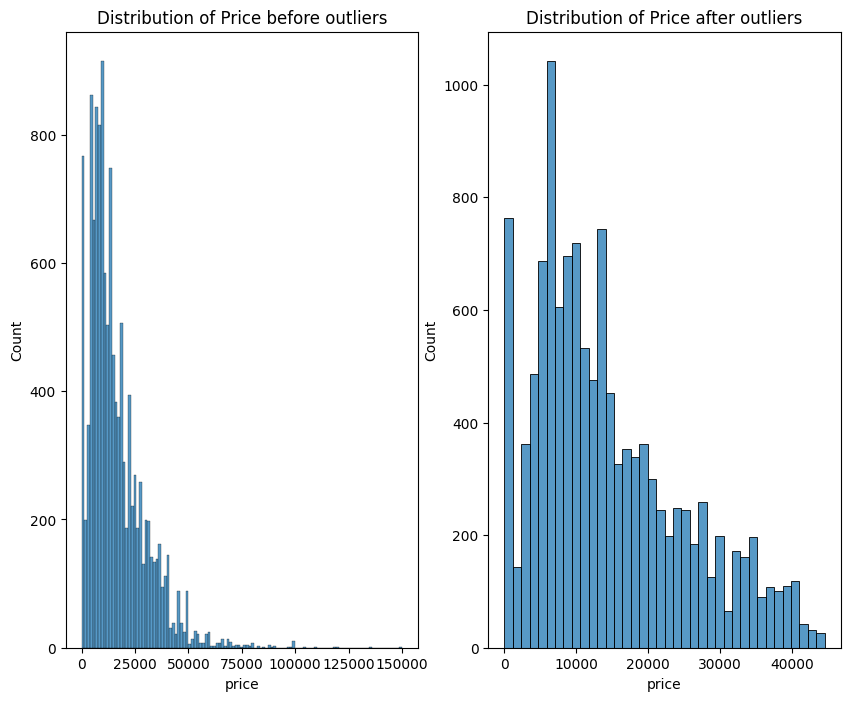

In [ ]:
#before & after deleting outliers for price
fig, ax= plt.subplots(1,2,figsize=(10,8))
fig = sns.histplot(clean_vehicles['price'], ax= ax[0]).set(title='Distribution of Price before outliers')
clean_vehicles = remove_outliers(clean_vehicles,'price')
fig = sns.histplot(clean_vehicles['price'], ax=ax[1]).set(title='Distribution of Price after outliers')
plt.show()

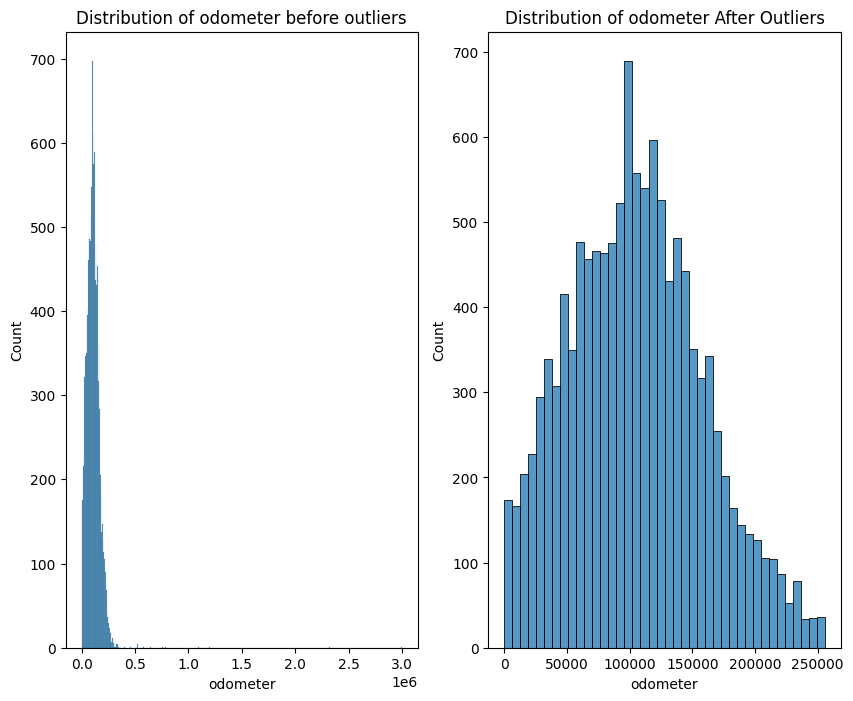

In [ ]:
#before & after deleting outliers for odomater
fig, ax = plt.subplots(1,2,figsize=(10,8))
fig = sns.histplot(clean_vehicles['odometer'], ax =ax[0]).set(title='Distribution of odometer before outliers')
clean_vehicles = remove_outliers(clean_vehicles,'odometer')
fig = sns.histplot(clean_vehicles['odometer'],ax=ax[1]).set(title='Distribution of odometer After Outliers')
plt.show()

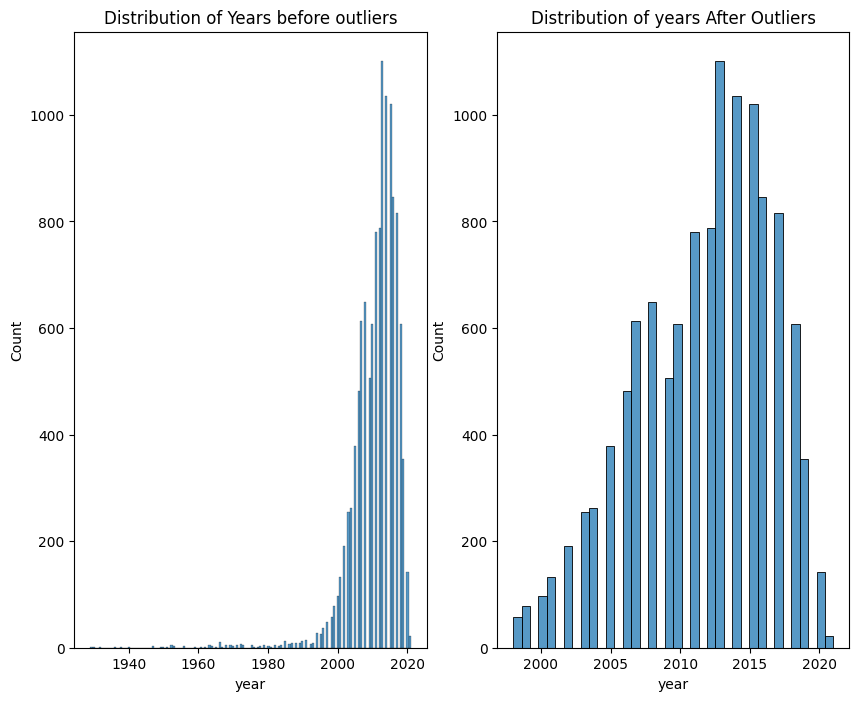

In [ ]:
#before & after deleting outliers for year
fig, ax = plt.subplots(1,2,figsize=(10,8))
fig = sns.histplot(clean_vehicles['year'], ax=ax[0]).set(title='Distribution of Years before outliers')
clean_vehicles = remove_outliers(clean_vehicles,'year')
fig = sns.histplot(clean_vehicles['year'], ax= ax[1]).set(title='Distribution of years After Outliers')

<Axes: title={'center': 'Histogram Plot for year'}, xlabel='year', ylabel='Count'>

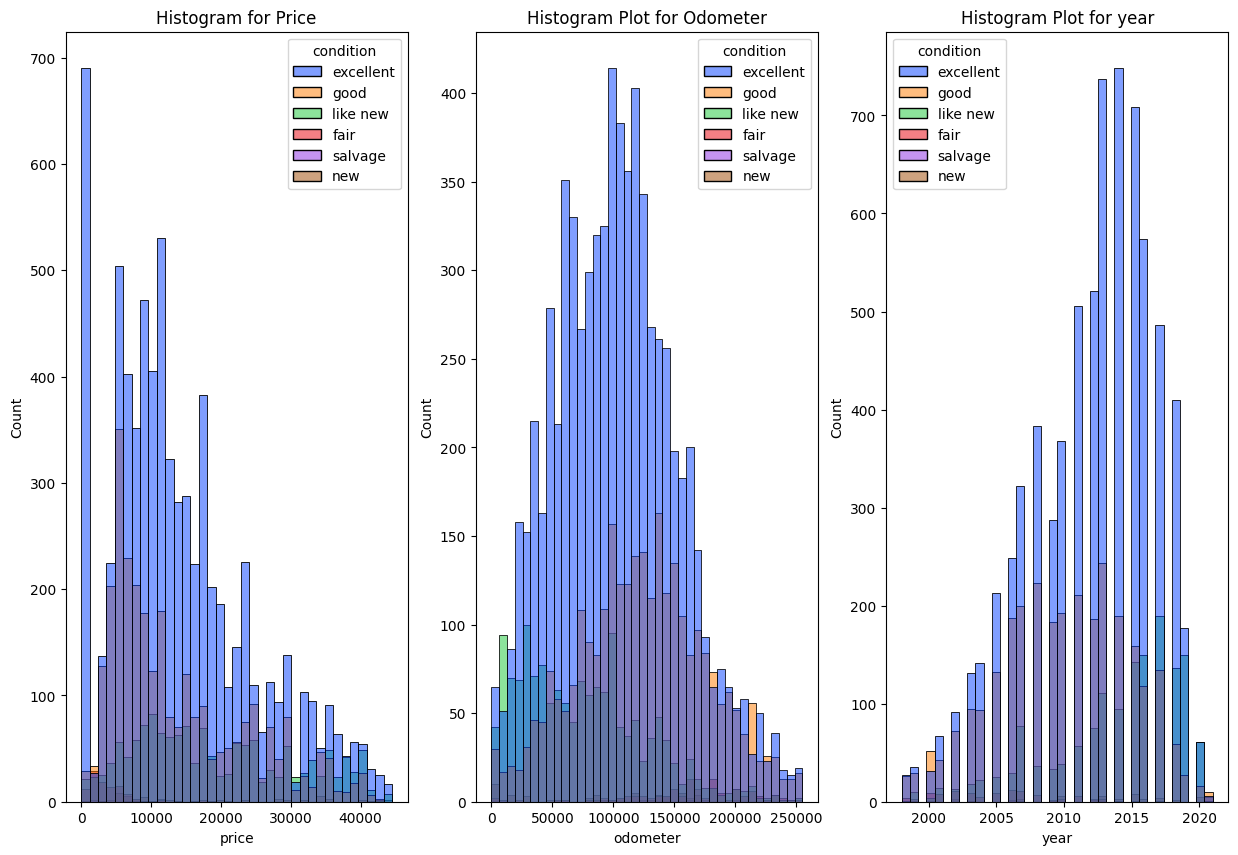

In [ ]:
# draw histograms of price, odometer & year with hue as condition
fig, ax = plt.subplots(1,3,figsize=(15,10))
fig = sns.histplot(data=clean_vehicles, x='price', palette='bright', hue='condition', ax=ax[0])
fig.set_title('Histogram for Price')
fig = sns.histplot(data=clean_vehicles, x='odometer', palette='bright', hue='condition',ax=ax[1])
fig.set_title('Histogram Plot for Odometer')
fig = sns.histplot(data=clean_vehicles, x='year', palette='bright', hue='condition',ax=ax[2])
fig.set_title('Histogram Plot for year')
fig

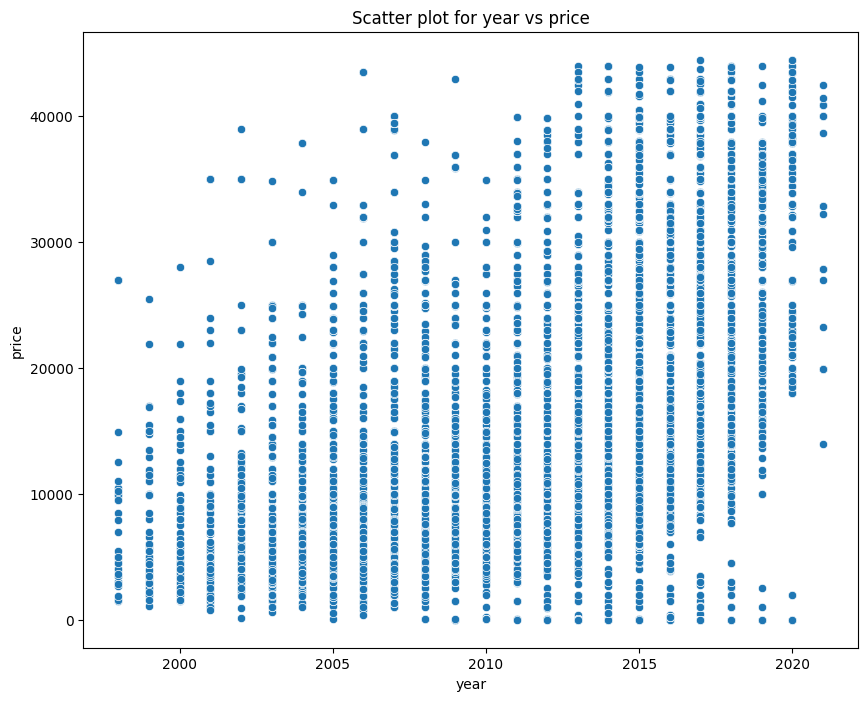

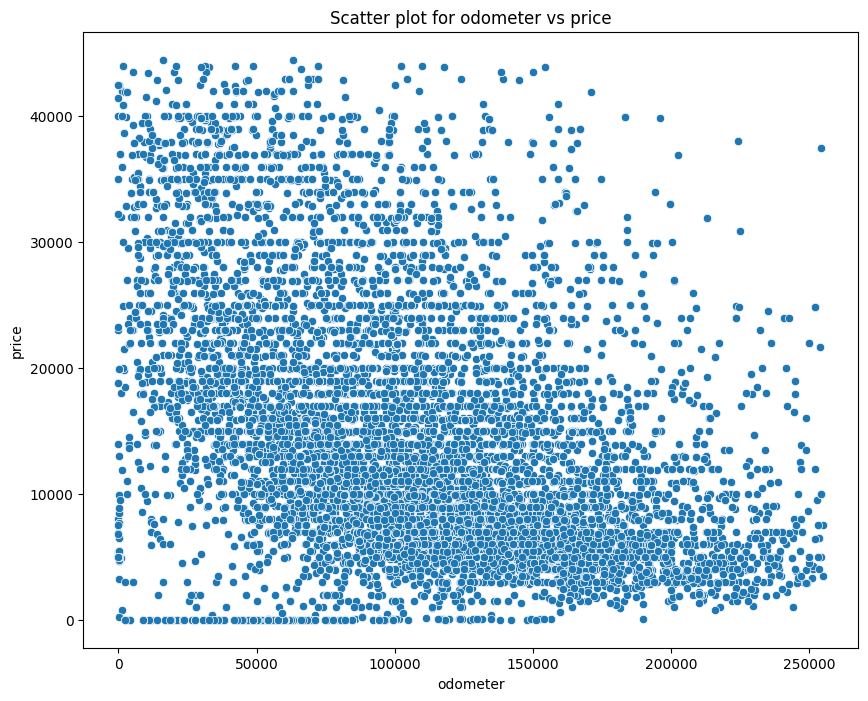

In [ ]:
# comnapring scatter plots for year & odometer with prices after deleting outliers
drawscatterplot(clean_vehicles,'year','price')
drawscatterplot(clean_vehicles,'odometer','price')

### Convert Categorical values into inter values

In [ ]:
#get category columns from the data
cat_cols = clean_vehicles.select_dtypes(include=['object']).columns
cat_cols

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'state'],
      dtype='object')

In [ ]:
# encode the category column values and create a dictionary
le = LabelEncoder()
le_encorers = {}
for col in cat_cols:
    #clean_vehicles[col] = le.fit_transform(clean_vehicles[col])
    encoded_values = le.fit_transform(clean_vehicles[col])
    le_name_mapping = dict(zip(encoded_values, clean_vehicles[col]))
    clean_vehicles[col] = encoded_values
    le_encorers[col] = le_name_mapping
    print('Feature', col)
    print('mapping', le_name_mapping)

Feature region
mapping {7: 'birmingham', 23: 'dothan', 31: 'florence / muscle shoals', 39: 'gadsden-anniston', 47: 'huntsville / decatur', 67: 'mobile', 71: 'montgomery', 120: 'tuscaloosa', 2: 'anchorage / mat-su', 54: 'kenai peninsula', 30: 'flagstaff / sedona', 69: 'mohave county', 86: 'phoenix', 87: 'prescott', 101: 'show low', 119: 'tucson', 128: 'yuma', 29: 'fayetteville', 35: 'fort smith', 53: 'jonesboro', 60: 'little rock', 117: 'texarkana', 6: 'bakersfield', 16: 'chico', 37: 'fresno / madera', 41: 'gold country', 46: 'humboldt county', 48: 'imperial county', 50: 'inland empire', 61: 'los angeles', 65: 'mendocino county', 66: 'merced', 68: 'modesto', 70: 'monterey bay', 80: 'orange county', 82: 'palm springs', 91: 'redding', 92: 'reno / tahoe', 94: 'sacramento', 95: 'san diego', 96: 'san luis obispo', 97: 'santa barbara', 98: 'santa maria', 0: 'SF bay area', 103: 'siskiyou county', 112: 'stockton', 113: 'susanville', 123: 'ventura county', 124: 'visalia-tulare', 127: 'yuba-sutte

In [ ]:
clean_vehicles.head()

region   price    year  manufacturer  model  condition  cylinders  fuel  \
0       7 4000.00 2002.00            34    791          0          3     2   
2       7 9000.00 2008.00            21   1604          0          3     2   
3       7 8950.00 2011.00            10    995          0          5     2   
6       7 9400.00 2008.00            22    365          2          5     2   
7       7 7300.00 2007.00            19   1944          2          5     2   

   odometer  title_status  transmission  drive  type  paint_color  state  
0 155000.00             0             0      1     9            1      1  
2  56700.00             0             0      2     2           10      1  
3 164000.00             0             0      1    10           10      1  
6 129473.00             0             0      2     9            9      1  
7 181000.00             0             0      1     0           10      1

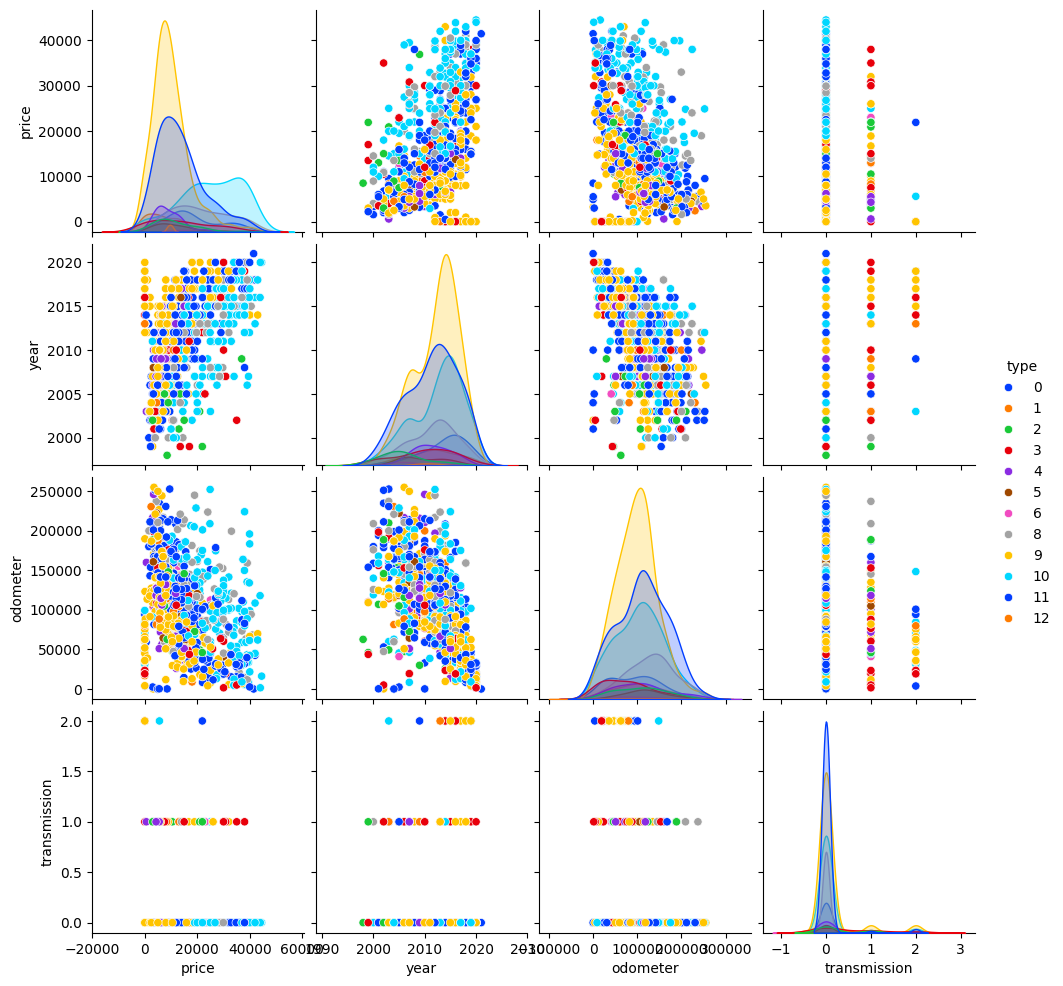

In [ ]:
#draw pariplot among set of fields

def sample_data(df,cols,no_of_samples,random_state):
    return df[cols].sample(n=no_of_samples, random_state=random_state)

def drawpairplot(df,hue,palette):
  sns.pairplot(df, hue=hue, palette=palette)
  plt.show()

drawpairplot(sample_data(clean_vehicles,['price', 'year','odometer', 'transmission','type'],1000,1),'type','bright')

**Observations**:


1.   There is a possitive corrleation between price and year
2.   There is a negetive correlation between price and odometer



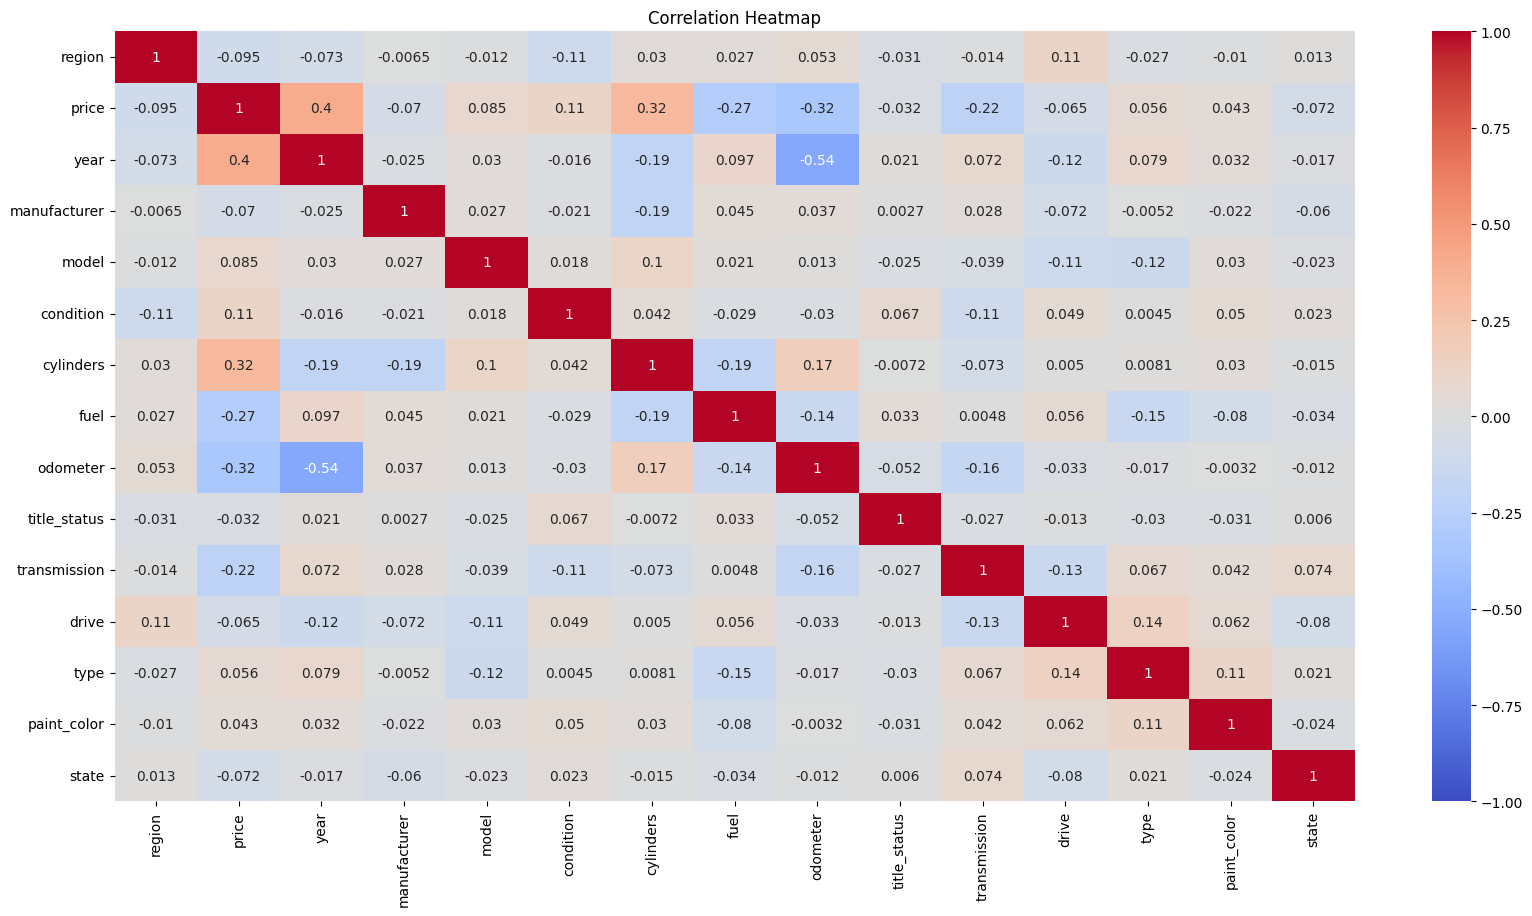

In [ ]:
#Create a correlation Heatmap with all columns
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(clean_vehicles.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap');

**Observations**:


1.   As expected price and Year has positive correlation
2.   Price and number of cylinders has postive correlation
3.   Surprisngly paint color also has positive correlation with price, type and drive types
4.   year has negative correlation with odometer and surprisngly with fule type
5.   Cylinders and fuel has negative correlation

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

I will split my data into train and development data sets and will use Linear Regression, Ridge and Lasso models to define best model

In [ ]:
# split data into train and development data
X = clean_vehicles.drop(columns=['price'])
y = clean_vehicles['price']

In [ ]:
# use train and test split method to split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


###LInear Regression

In [ ]:
# collect all model results in a list for final comparision
results = []

# define a simple Linear Regression model and find MSE, MAE
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)
train_predicts_ln = pipeline.predict(X_train)
test_predicts_ln = pipeline.predict(X_test)

train_mse_ln = mean_squared_error(y_train, train_predicts_ln)
test_mse_ln = mean_squared_error(y_test, test_predicts_ln)
train_mae_ln = mean_absolute_error(y_train, train_predicts_ln)
test_mae_ln = mean_absolute_error(y_test, test_predicts_ln)

print(f"Linear Model: train_mse={train_mse_ln}, test_mse={test_mse_ln}")
print(f"Linear Model: train_mae={train_mae_ln}, test_mae={test_mae_ln}")
print(f"Model Accuracy: {round(pipeline.score(X_test, y_test)*100,2)}")
print(f"Model Coefficients: {pipeline.named_steps['model'].coef_}")
print(f"Model Intercepts: {pipeline.named_steps['model'].intercept_}")

simple_linear_results = {
    'model': 'Linear Regression',
    'train_mse': train_mse_ln,
    'test_mse': test_mse_ln,
    'train_mae': train_mae_ln,
    'test_mae': test_mae_ln,
    'accuracy': round(pipeline.score(X_test, y_test)*100,2),
    'coefficients': pipeline.named_steps['model'].coef_,
    'intercept': pipeline.named_steps['model'].intercept_
}
results.append(simple_linear_results)

Linear Model: train_mse=53880239.89534473, test_mse=54425738.64547783
Linear Model: train_mae=5430.65451557412, test_mae=5433.539743275255
Model Accuracy: 48.68
Model Coefficients: [ -448.54363021  3697.36914901   375.48230406   240.94370631
   605.55355227  3811.41998193 -2772.76739158 -2799.72256116
  -515.21089412 -2593.55475773  -499.65433214   110.59356252
   105.48566967  -581.31046095]
Model Intercepts: 14563.411650954735


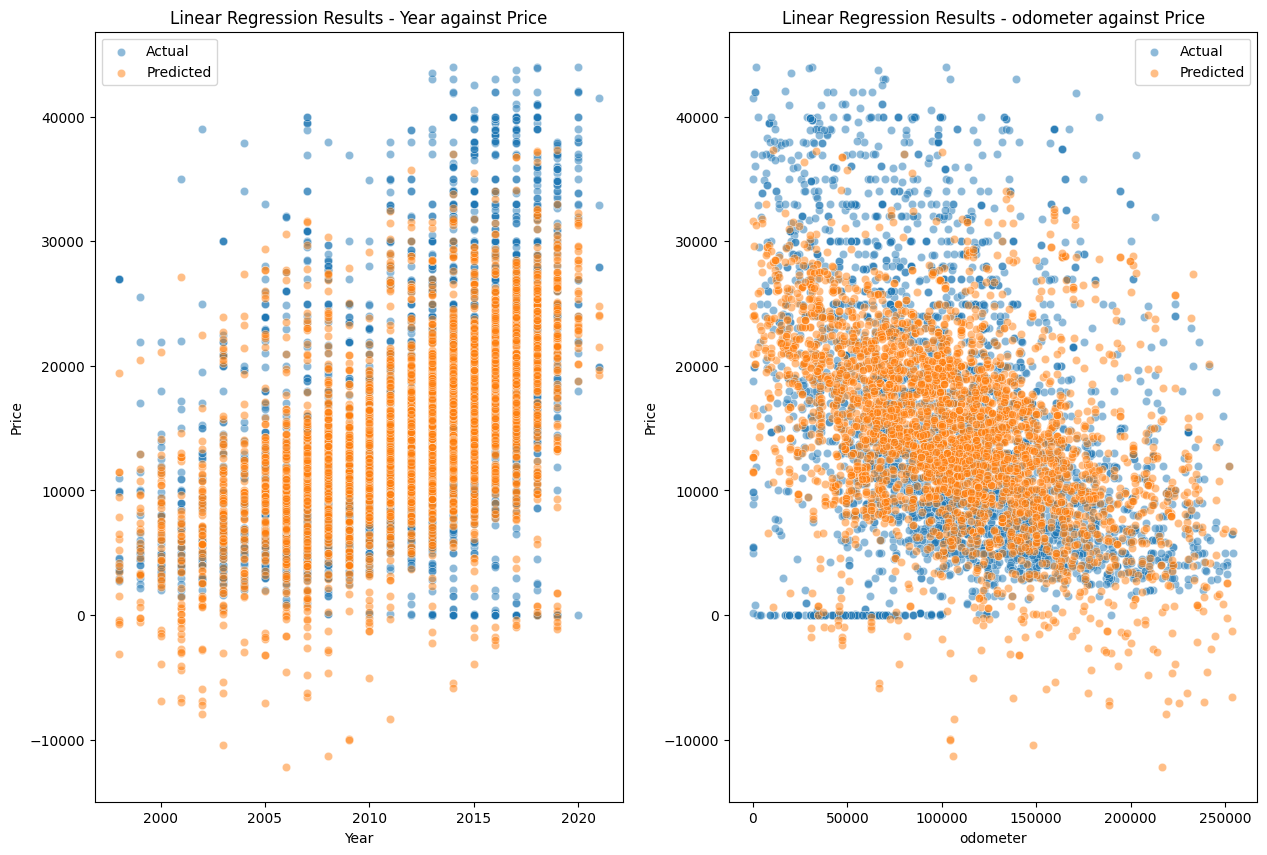

In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=test_predicts_ln, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression Results - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=test_predicts_ln, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression Results - odometer against Price')
plt.show()

###LInear Regression with Polynomial Degrees

In [ ]:
# define a  Linear Regression model with Polynomial degree 2 and find MSE, MAE
pipeline_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])
pipeline_poly.fit(X_train, y_train)
train_predicts_poly= pipeline_poly.predict(X_train)
test_predicts_poly = pipeline_poly.predict(X_test)

train_mse_poly = mean_squared_error(y_train, train_predicts_poly)
test_mse_poly = mean_squared_error(y_test, test_predicts_poly)
train_mae_poly= mean_absolute_error(y_train, train_predicts_poly)
test_mae_poly = mean_absolute_error(y_test, test_predicts_poly)

print(f"Linear Model: train_mse={train_mse_poly}, test_mse={test_mse_poly}")
print(f"Linear Model: train_mae={train_mae_poly}, test_mae={test_mae_poly}")
print(f"Model Accuracy: {round(pipeline_poly.score(X_test, y_test)*100,2)}")
#print(f"Model Coefficients: {pipeline_poly.named_steps['model'].coef_}")
print(f"Model Intercepts: {pipeline_poly.named_steps['model'].intercept_}")

poly_linear_results = {
    'model': 'Poly Degree 2 Linear Regression',
    'train_mse': train_mse_poly,
    'test_mse': test_mse_poly,
    'train_mae': train_mae_poly,
    'test_mae': test_mae_poly,
    'accuracy': round(pipeline_poly.score(X_test, y_test)*100,2),
    'coefficients': pipeline_poly.named_steps['model'].coef_,
    'intercept': pipeline_poly.named_steps['model'].intercept_
}

results.append(poly_linear_results)

Linear Model: train_mse=34162980.47585121, test_mse=35883702.86937455
Linear Model: train_mae=4043.035933758014, test_mae=4157.83905233703
Model Accuracy: 66.17
Model Intercepts: 10411.938158530022


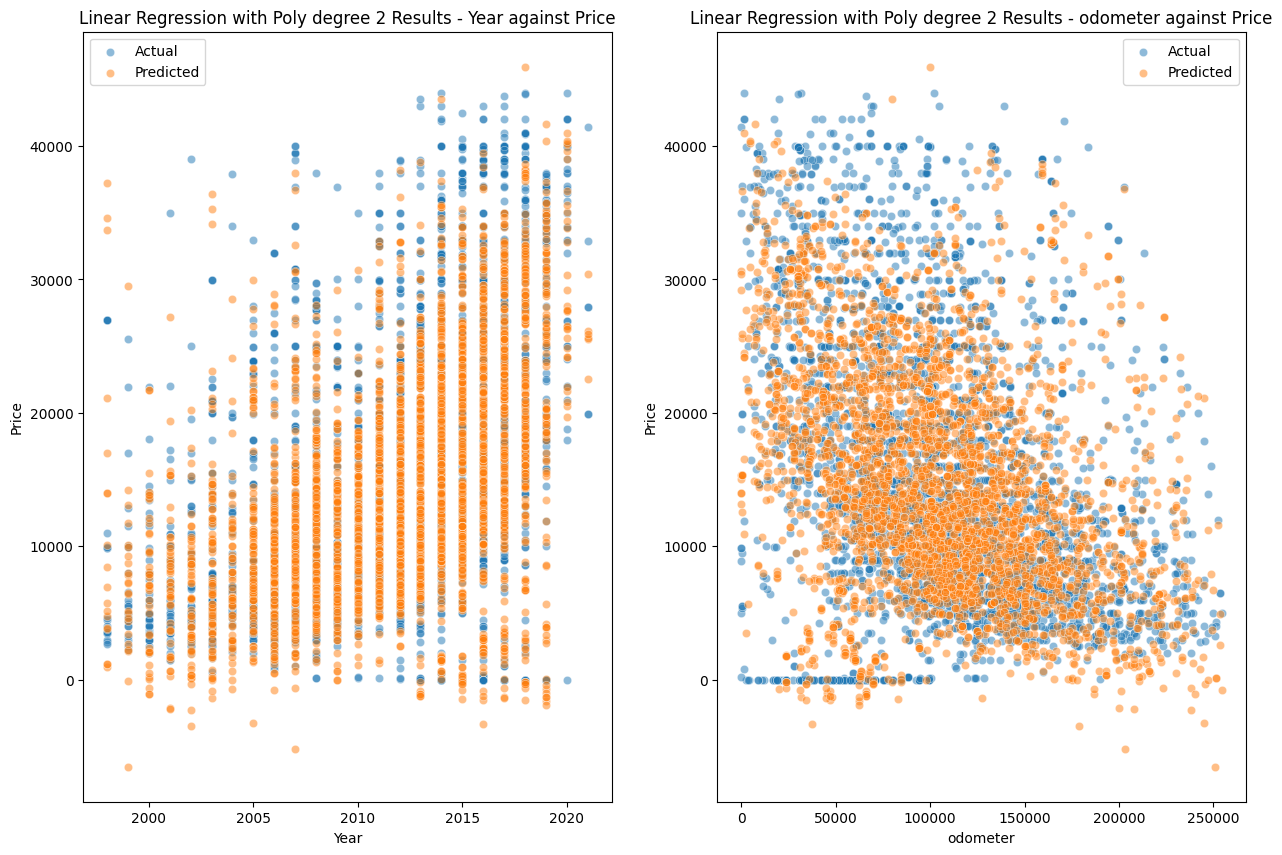

In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=test_predicts_poly, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression with Poly degree 2 Results - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=test_predicts_poly, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression with Poly degree 2 Results - odometer against Price')
plt.show()

###Linear Regression with Grid Search

In [ ]:
# create a pipeline with linear regression but do not include degree
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])

# define degree parameters to assign to Grid search
param_grid ={
    'poly__degree':[1,2,3]
}

grid_linear = GridSearchCV(pipeline, param_grid, cv=5)
grid_linear.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3]})

In [ ]:
#what is the best estimator and degree
best_params_linear = grid_linear.best_params_
best_model_linear = grid_linear.best_estimator_

print(f"Best Parameters: {best_params_linear}")
print(f"Best Model: {best_model_linear}")

Best Parameters: {'poly__degree': 2}
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])


In [ ]:
# from the best model, calculare MSE & MAE
pred_train_grid = best_model_linear.predict(X_train)
pred_test_grid = best_model_linear.predict(X_test)

train_mse_grid = mean_squared_error(y_train, pred_train_grid)
test_mse_grid = mean_squared_error(y_test, pred_test_grid)
train_mae_grid = mean_absolute_error(y_train, pred_train_grid)
test_mae_grid = mean_absolute_error(y_test, pred_test_grid)

print(f"Grid Search Linear Model: train_mse={train_mse_grid}, test_mse={test_mse_grid}")
print(f"Grid Search Linear Model: train_mae={train_mae_grid}, test_mae={test_mae_grid}")
print(f"Model Accuracy: {round(best_model_linear.score(X_test, y_test)*100,2)}")
#print(f"Model Coefficients: {best_model_linear.named_steps['model'].coef_}")
print(f"Model Intercepts: {best_model_linear.named_steps['model'].intercept_}")

grid_linear_results={
    'model': 'Grid Search Linear Regression',
    'train_mse': train_mse_grid,
    'test_mse': test_mse_grid,
    'train_mae': train_mae_grid,
    'test_mae': test_mae_grid,
    'accuracy': round(best_model_linear.score(X_test, y_test)*100,2),
    'coefficients': best_model_linear.named_steps['model'].coef_,
    'intercept': best_model_linear.named_steps['model'].intercept_
}
results.append(grid_linear_results)

Grid Search Linear Model: train_mse=34162980.47585121, test_mse=35883702.86937455
Grid Search Linear Model: train_mae=4043.035933758014, test_mae=4157.83905233703
Model Accuracy: 66.17
Model Intercepts: 10411.938158530022


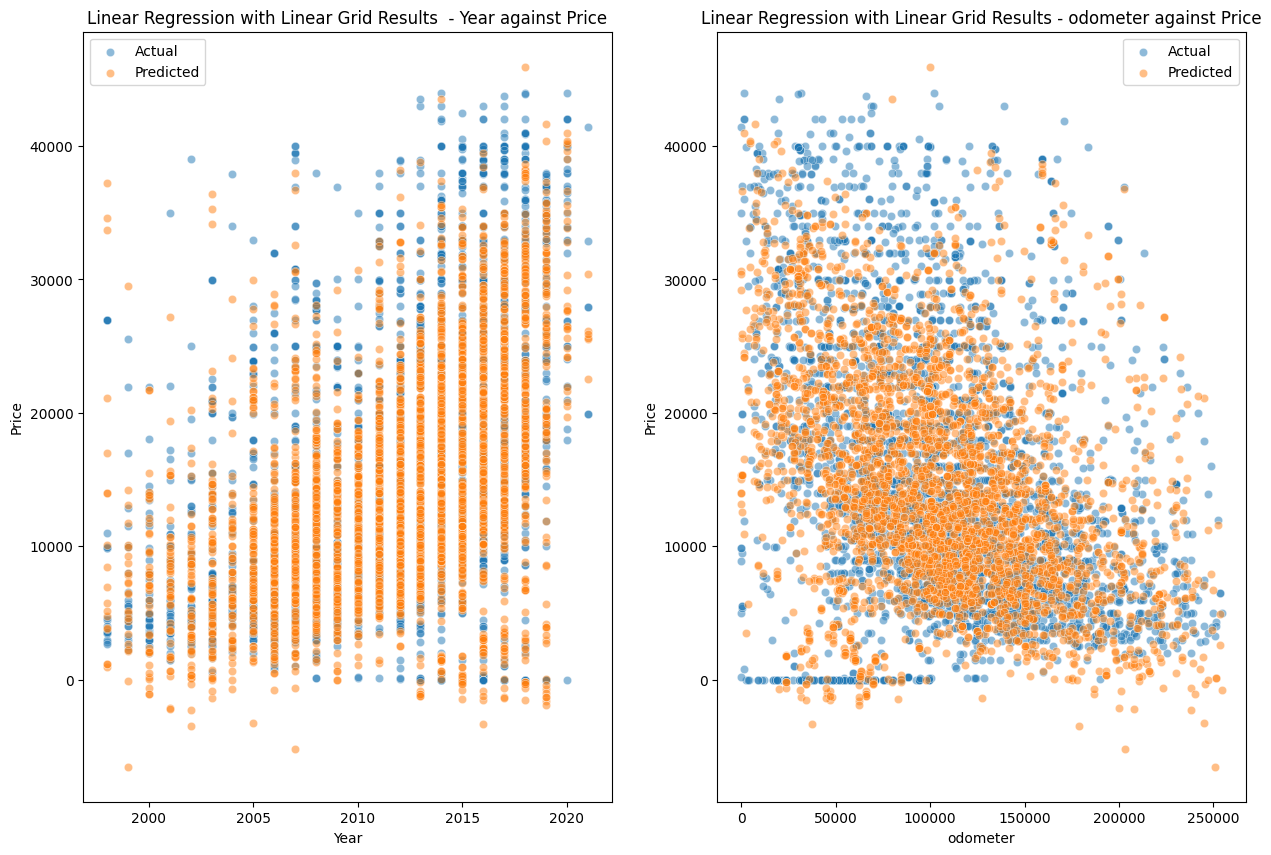

In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=pred_test_grid, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression with Linear Grid Results  - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=pred_test_grid, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression with Linear Grid Results - odometer against Price')
plt.show()

### Ridge Regression with Grid Search

In [ ]:
# create pipeline with ridge regressoion
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', Ridge())
])

param_grid={
    'poly__degree':[1,2,3],
    'model__alpha':[0.1,1,10]
}

grid_ridge = GridSearchCV(ridge_pipeline, param_grid, cv=5)
grid_ridge.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.1, 1, 10],
                         'poly__degree': [1, 2, 3]})

In [ ]:
# find the best alpha and degree
best_model_ridge = grid_ridge.best_estimator_
best_params_ridge = grid_ridge.best_params_

print(f"Best Parameters: {best_params_ridge}")
print(f"Best Model: {best_model_ridge}")

Best Parameters: {'model__alpha': 10, 'poly__degree': 3}
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('model', Ridge(alpha=10))])


In [ ]:
preds_train_ridge = best_model_ridge.predict(X_train)
preds_test_ridge = best_model_ridge.predict(X_test)

train_mse_ridge = mean_squared_error(y_train, preds_train_ridge)
test_mse_ridge = mean_squared_error(y_test, preds_test_ridge)
train_mae_ridge = mean_absolute_error(y_train, preds_train_ridge)
test_mae_ridge = mean_absolute_error(y_test, preds_test_ridge)

print(f"Grid Search Ridge Model: train_mse={train_mse_ridge}, test_mse={test_mse_ridge}")
print(f"Grid Search Ridge Model: train_mae={train_mae_ridge}, test_mae={test_mae_ridge}")
print(f"Model Accuracy: {round(best_model_ridge.score(X_test, y_test)*100,2)}")
#print(f"Model Coefficients: {best_model_ridge.named_steps['model'].coef_}")
print(f"Model Intercepts: {best_model_ridge.named_steps['model'].intercept_}")

grid_ridge_results={
    'model': 'Grid Search Ridge Regression',
    'train_mse': train_mse_ridge,
    'test_mse': test_mse_ridge,
    'train_mae': train_mae_ridge,
    'test_mae': test_mae_ridge,
    'accuracy': round(best_model_ridge.score(X_test, y_test)*100,2),
    'coefficients': best_model_ridge.named_steps['model'].coef_,
    'intercept': best_model_ridge.named_steps['model'].intercept_
}
results.append(grid_ridge_results)


Grid Search Ridge Model: train_mse=24601884.193622954, test_mse=31747408.088659033
Grid Search Ridge Model: train_mae=3373.478255051798, test_mae=3784.0866430846368
Model Accuracy: 70.07
Model Intercepts: 8723.869067567495


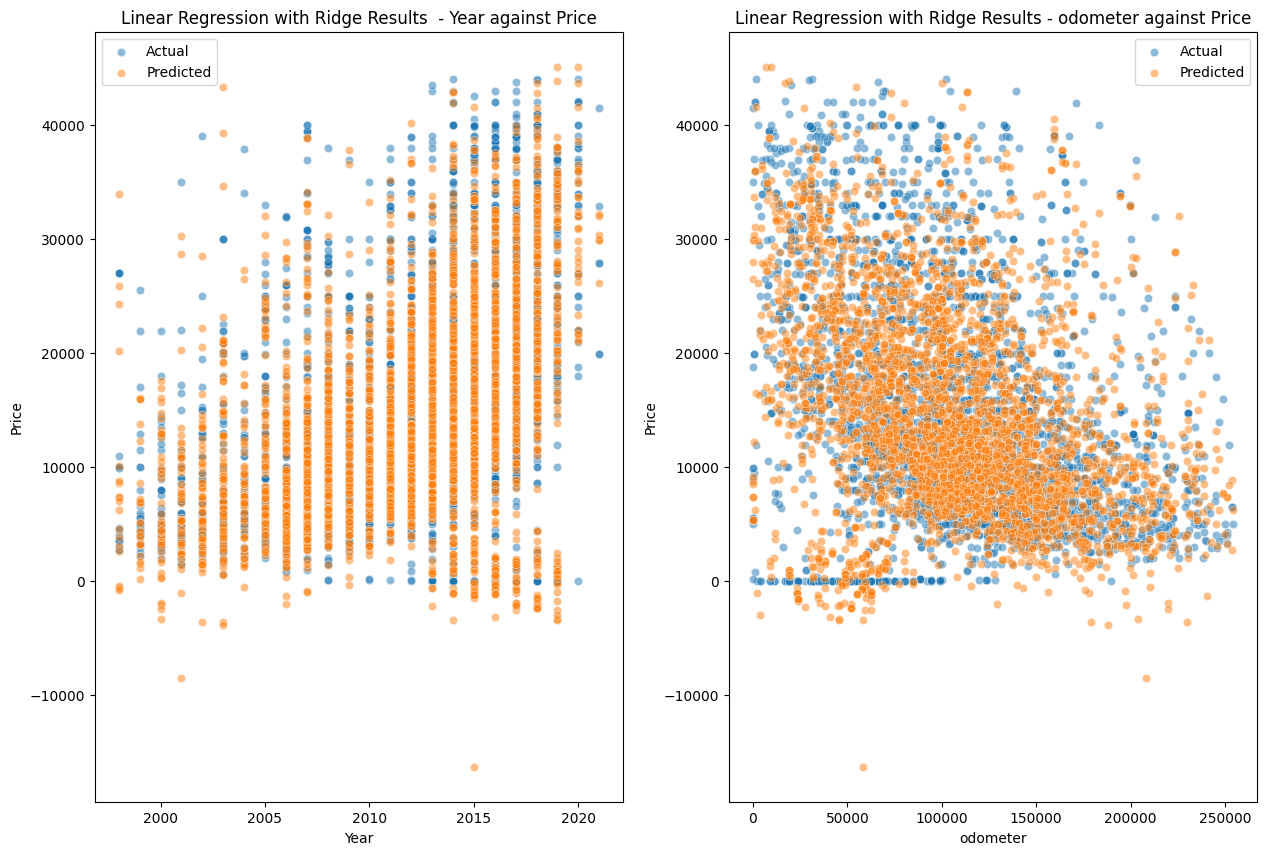

In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=preds_test_ridge, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression with Ridge Results  - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=preds_test_ridge, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression with Ridge Results - odometer against Price')
plt.show()

### Lasso Regression with Grid Search

In [ ]:
# create lasso pipeline using GridSearch

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', Lasso(random_state = 42))
])

param_grid={
    'poly__degree':[1,2,3]
}

grid_lasso = GridSearchCV(lasso_pipeline, param_grid, cv=5)
grid_lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.577e+10, tolerance: 7.068e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.551e+10, tolerance: 7.058e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.639e+10, tolerance: 7.185e

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', Lasso(random_state=42))]),
             param_grid={'poly__degree': [1, 2, 3]})

In [ ]:
#best model
best_model_lasso = grid_lasso.best_estimator_
best_params_lasso = grid_lasso.best_params_

print(f"Best Parameters: {best_params_lasso}")
print(f"Best Model: {best_model_lasso}")

Best Parameters: {'poly__degree': 3}
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('model', Lasso(random_state=42))])


In [ ]:
train_preds_lasso = best_model_lasso.predict(X_train)
test_preds_lasso = best_model_lasso.predict(X_test)

train_mse_lasso = mean_squared_error(y_train, train_preds_lasso)
test_mse_lasso = mean_squared_error(y_test, test_preds_lasso)
train_mae_lasso = mean_absolute_error(y_train, train_preds_lasso)
test_mae_lasso = mean_absolute_error(y_test, test_preds_lasso)

print(f"Grid Search Lasso Model: train_mse={train_mse_lasso}, test_mse={test_mse_lasso}")
print(f"Grid Search Lasso Model: train_mae={train_mae_lasso}, test_mae={test_mae_lasso}")
print(f"Model Accuracy: {round(best_model_lasso.score(X_test, y_test)*100,2)}")
#print(f"Model Coefficients: {best_model_lasso.named_steps['model'].coef_}")
print(f"Model Intercepts: {best_model_lasso.named_steps['model'].intercept_}")

grid_lasso={
    'model': 'Grid Search Lasso Regression',
    'train_mse': train_mse_lasso,
    'test_mse': test_mse_lasso,
    'train_mae': train_mae_lasso,
    'test_mae': test_mae_lasso,
    'accuracy': round(best_model_lasso.score(X_test, y_test)*100,2),
    'coefficients': best_model_lasso.named_steps['model'].coef_,
    'intercept': best_model_lasso.named_steps['model'].intercept_
}
results.append(grid_lasso)


Grid Search Lasso Model: train_mse=24607760.317693487, test_mse=31404853.45276138
Grid Search Lasso Model: train_mae=3372.2890726010464, test_mae=3772.1150747023794
Model Accuracy: 70.39
Model Intercepts: 8798.77370490636


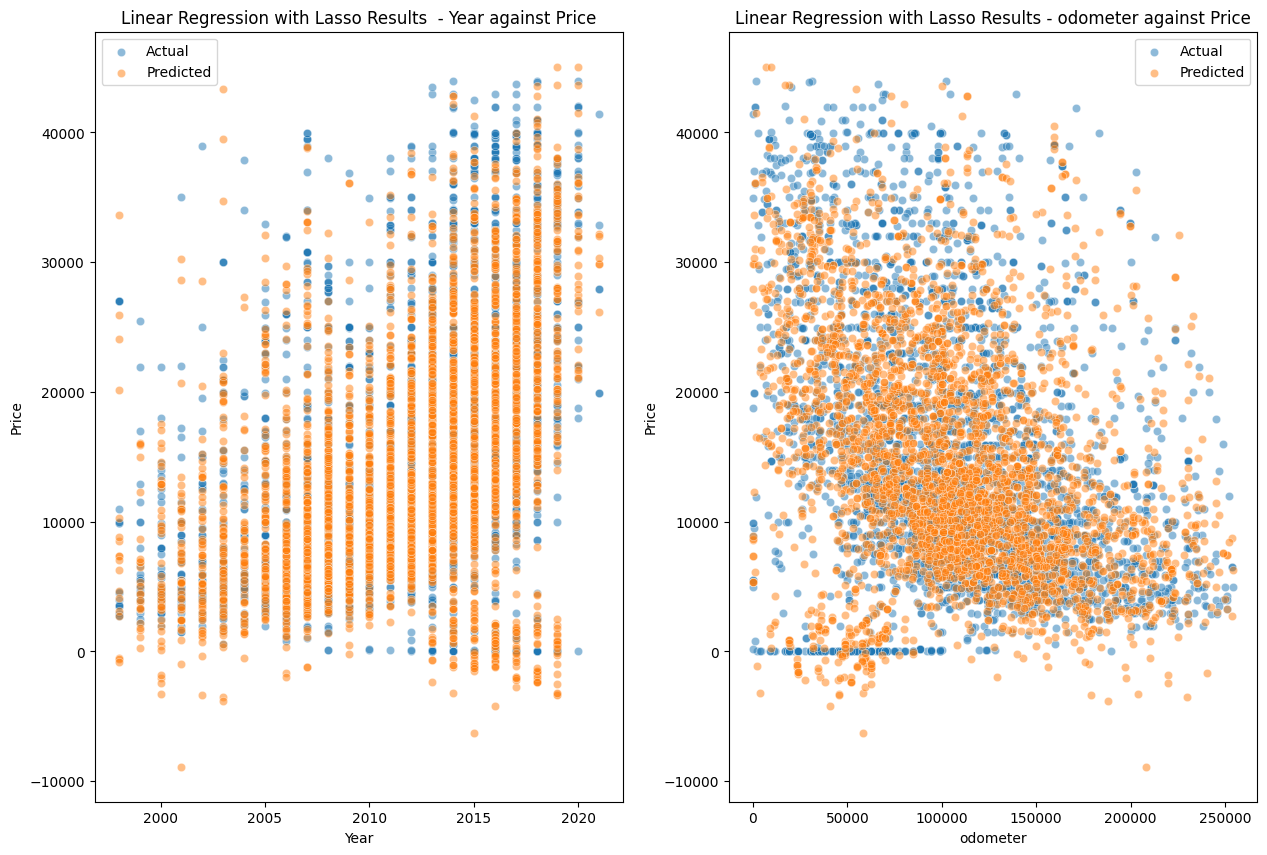

In [ ]:
## Visualization of how well the model did by plotting the actual and predicted values for both year and odometer against price
fig, axes = plt.subplots(1, 2, figsize =(15, 10))
fig = sns.scatterplot(x=X_test.year, y=y_test, ax=axes[0], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.year, y=test_preds_lasso, ax=axes[0], label ='Predicted', alpha=0.5)
axes[0].set(xlabel='Year', ylabel='Price')
axes[0].legend()
axes[0].set_title('Linear Regression with Lasso Results  - Year against Price')

fig = sns.scatterplot(x=X_test.odometer, y=y_test, ax=axes[1], label ='Actual', alpha=0.5)
fig = sns.scatterplot(x=X_test.odometer, y=test_preds_lasso, ax=axes[1], label ='Predicted', alpha=0.5)
axes[1].set(xlabel='odometer', ylabel='Price')
axes[1].legend()
axes[1].set_title('Linear Regression with Lasso Results - odometer against Price')
plt.show()

### Sequential Feature selection



In [ ]:
#Create a pipline with sequential feature selection

from sklearn.feature_selection import SequentialFeatureSelector

seq_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('feature_selection', SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward')),
    ('model', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3]
}

grid_seq = GridSearchCV(seq_pipeline, param_grid, cv=5)
grid_seq.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('feature_selection',
                                        SequentialFeatureSelector(estimator=LinearRegression(),
                                                                  n_features_to_select=5)),
                                       ('model', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3]})

In [ ]:
best_model_seq = grid_seq.best_estimator_
best_params_seq = grid_seq.best_params_

print(f"Best Parameters: {best_params_seq}")
print(f"Best Model: {best_model_seq}")

Best Parameters: {'poly__degree': 3}
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('feature_selection',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('model', LinearRegression())])


In [ ]:
train_preds_seq = best_model_seq.predict(X_train)
test_preds_seq = best_model_seq.predict(X_test)

train_mse_seq = mean_squared_error(y_train, train_preds_seq)
test_mse_seq = mean_squared_error(y_test, test_preds_seq)
train_mae_seq= mean_absolute_error(y_train, train_preds_seq)
test_mae_seq = mean_absolute_error(y_test, test_preds_seq)

print(f"Grid Search Lasso Model: train_mse={train_mse_seq}, test_mse={test_mse_seq}")
print(f"Grid Search Lasso Model: train_mae={train_mae_seq}, test_mae={test_mae_seq}")
print(f"Model Accuracy: {round(best_model_seq.score(X_test, y_test)*100,2)}")
print(f"Model Intercepts: {best_model_seq.named_steps['model'].intercept_}")

grid_seq ={
    'model': 'Grid Search Sequential Feature Selection',
    'train_mse': train_mse_seq,
    'test_mse': test_mse_seq,
    'train_mae': train_mae_seq,
    'test_mae': test_mae_seq,
    'accuracy': round(best_model_seq.score(X_test, y_test)*100,2),
    'coefficients': best_model_seq.named_steps['model'].coef_,
    'intercept': best_model_seq.named_steps['model'].intercept_
}
results.append(grid_seq)

Grid Search Lasso Model: train_mse=49765291.2782854, test_mse=52182598.12111632
Grid Search Lasso Model: train_mae=5131.812294139564, test_mae=5197.143566644686
Model Accuracy: 50.8
Model Intercepts: 14373.610560057708


### K-Fold Feature selection

In [ ]:
from sklearn.model_selection import KFold

# create a linear regression pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Define the K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'poly__degree': [1, 2, 3]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3]})

In [ ]:
# best degree for KFOLD
best_model_kfold = grid_search.best_estimator_
best_params_kfold = grid_search.best_params_

print(f"Best Parameters: {best_params_kfold}")
print(f"Best Model: {best_model_kfold}")

Best Parameters: {'poly__degree': 2}
Best Model: Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])


In [ ]:
train_preds_kf = best_model_kfold.predict(X_train)
test_preds_kf = best_model_kfold.predict(X_test)

  # Calculate evaluation metrics
train_mse_kf = mean_squared_error(y_train, train_preds_kf)
test_mse_kf = mean_squared_error(y_test, test_preds_kf)
train_mae_kf= mean_absolute_error(y_train, train_preds_kf)
test_mae_kf = mean_absolute_error(y_test, test_preds_kf)

print(f"Grid Search Lasso Model: train_mse={train_mse_kf}, test_mse={test_mse_kf}")
print(f"Grid Search Lasso Model: train_mae={train_mae_kf}, test_mae={test_mae_kf}")
print(f"Model Accuracy: {round(best_model_kfold.score(X_test, y_test)*100,2)}")
print(f"Model Intercepts: {best_model_kfold.named_steps['linear_regression'].intercept_}")

grid_kfold={
    'model': 'Grid Search K-Fold Feature Selection',
    'train_mse': train_mse_kf,
    'test_mse': test_mse_kf,
    'train_mae': train_mae_kf,
    'test_mae': test_mae_kf,
    'accuracy': round(best_model_kfold.score(X_test, y_test)*100,2),
    'coefficients': best_model_kfold.named_steps['linear_regression'].coef_,
    'intercept': best_model_kfold.named_steps['linear_regression'].intercept_
}
results.append(grid_kfold)

Grid Search Lasso Model: train_mse=34162980.47585116, test_mse=35883702.86937474
Grid Search Lasso Model: train_mae=4043.0359337580503, test_mae=4157.839052337084
Model Accuracy: 66.17
Model Intercepts: 14563.411650961747


**Observation** : All the models performed better with minor differences, the scatter plots show similar distrubution when compared to actual and model predictions.

In [ ]:
#create data frame with all the model results

model_results = pd.DataFrame(results)
model_results.sort_values(by='accuracy', ascending=False).drop_duplicates(subset=['model'])

model   train_mse    test_mse  \
4              Grid Search Lasso Regression 24607760.32 31404853.45   
3              Grid Search Ridge Regression 24601884.19 31747408.09   
1           Poly Degree 2 Linear Regression 34162980.48 35883702.87   
2             Grid Search Linear Regression 34162980.48 35883702.87   
6      Grid Search K-Fold Feature Selection 34162980.48 35883702.87   
5  Grid Search Sequential Feature Selection 49765291.28 52182598.12   
0                         Linear Regression 53880239.90 54425738.65   

   train_mae  test_mae  accuracy  \
4    3372.29   3772.12     70.39   
3    3373.48   3784.09     70.07   
1    4043.04   4157.84     66.17   
2    4043.04   4157.84     66.17   
6    4043.04   4157.84     66.17   
5    5131.81   5197.14     50.80   
0    5430.65   5433.54     48.68   

                                        coefficients  intercept  
4  [461.7169865656794, 5389.407638333977, -1049.5...    8798.77  
3  [486.7359655652659, 5211.038336169848, -1078.2...    8723.87  
1  [-203.02652095000187, 4532.425811320777, 164.1...   10411.94  
2  [-203.02652095000187, 4532.425811320777, 164.1...   10411.94  
6  [-90364.71292025046, -678357.3622030114, -1555...   14563.41  
5  [4810.816696438993, 3956.9614381685788, -2581....   14373.61  
0  [-448.543630208054, 3697.3691490103647, 375.48...   14563.41

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

It took lot of time to execute all the models with different degree and alpha values, i limited myself to degree upto 3 for Grid Search due to heavy computational time, In most of the cases , i got best degree is 3 and alpha 10.
From the data frame I created (I followed the apprach by a github user 'jaruizsys'), i compared the MSE and MAE values and picked one better model

Text(0, 0.5, 'MSE')

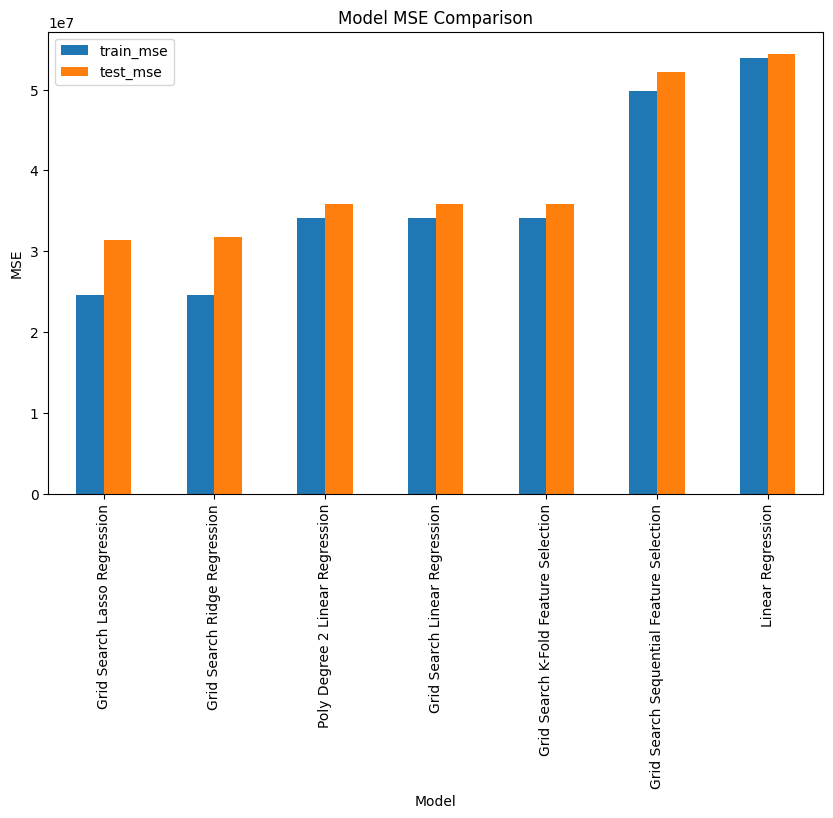

In [ ]:
df_results = model_results[['model','train_mse','test_mse']].sort_values(by='test_mse', ascending=True).drop_duplicates(subset=['model'])
df_results.plot(x='model',kind='bar',figsize=(10,6))
plt.title('Model MSE Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')


Text(0, 0.5, 'MAE')

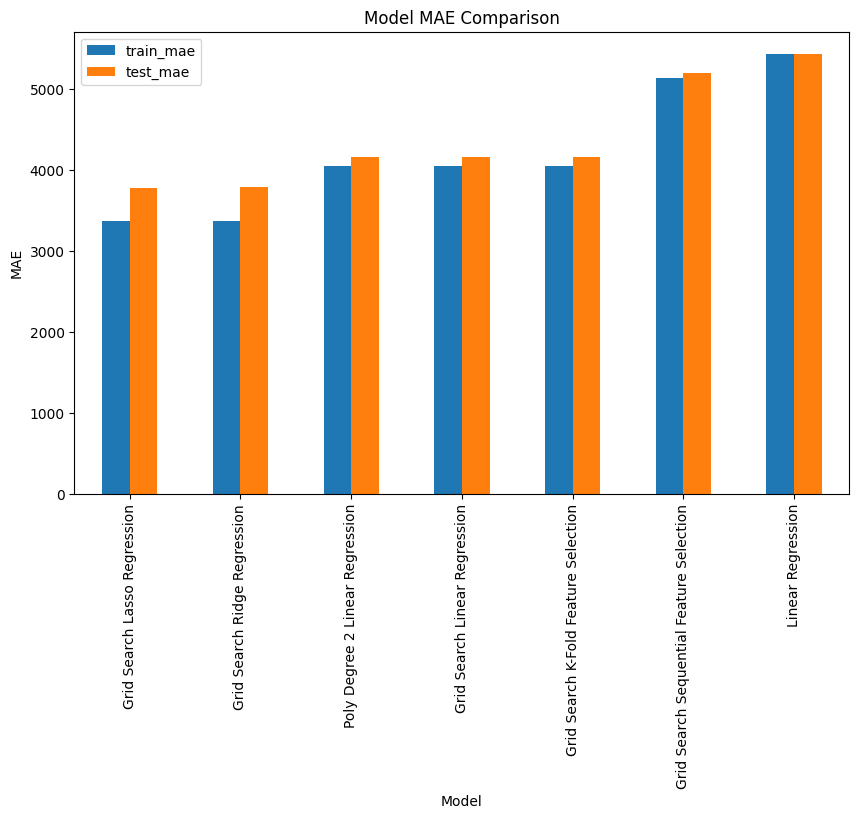

In [ ]:
df_results = model_results[['model','train_mae','test_mae',]].sort_values(by='test_mae', ascending=True).drop_duplicates(subset=['model'])
df_results.plot(x='model',kind='bar',figsize=(10,6))
plt.title('Model MAE Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')

<ipython-input-68-1b8273dd9382>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Accuracy')

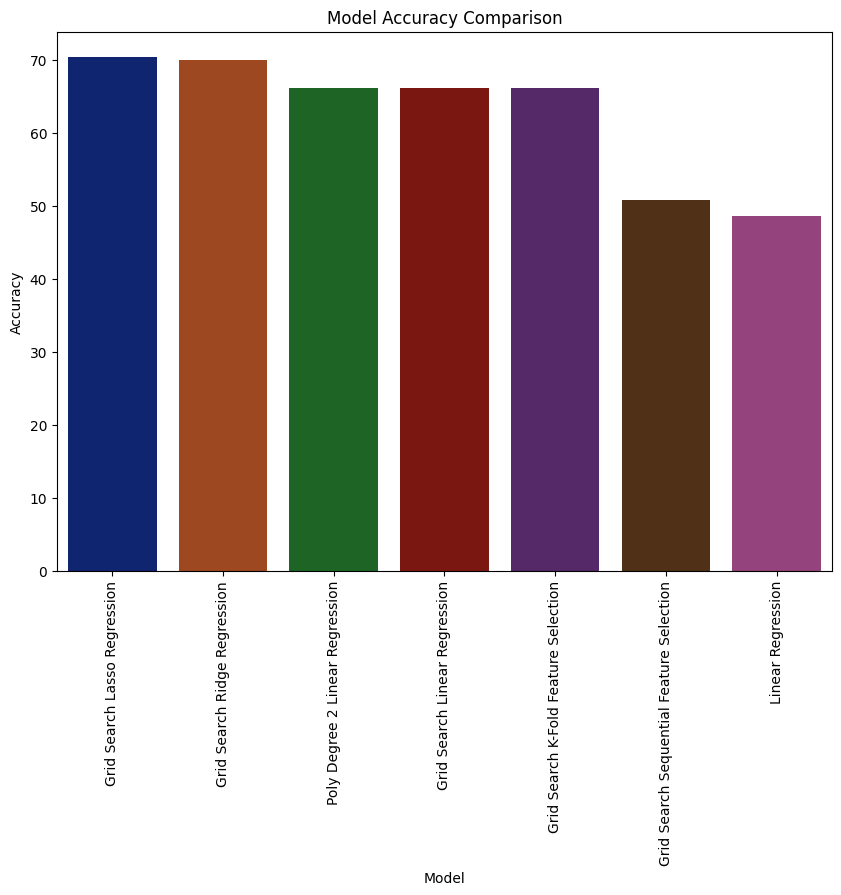

In [ ]:
# draw acccuracy bar plot using sns
df_results = model_results[['model','accuracy']].sort_values(by='accuracy', ascending=False)
fig, ax = plt.subplots(figsize=(10,7))
fig = sns.barplot(x=df_results.model, y=df_results.accuracy, ax=ax, palette='dark', hue=df_results.model, legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')


Observation: From the above two diagrams and from the data frame it is obvious that the lasso regression has less MSE and MAE value

In [ ]:
# create Permutation importance for lasso model
from sklearn.inspection import permutation_importance
permu = permutation_importance(best_model_lasso, X_test, y_test,n_repeats=30,random_state=0)
importance_df = pd.DataFrame(permu.importances_mean, index=X_test.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

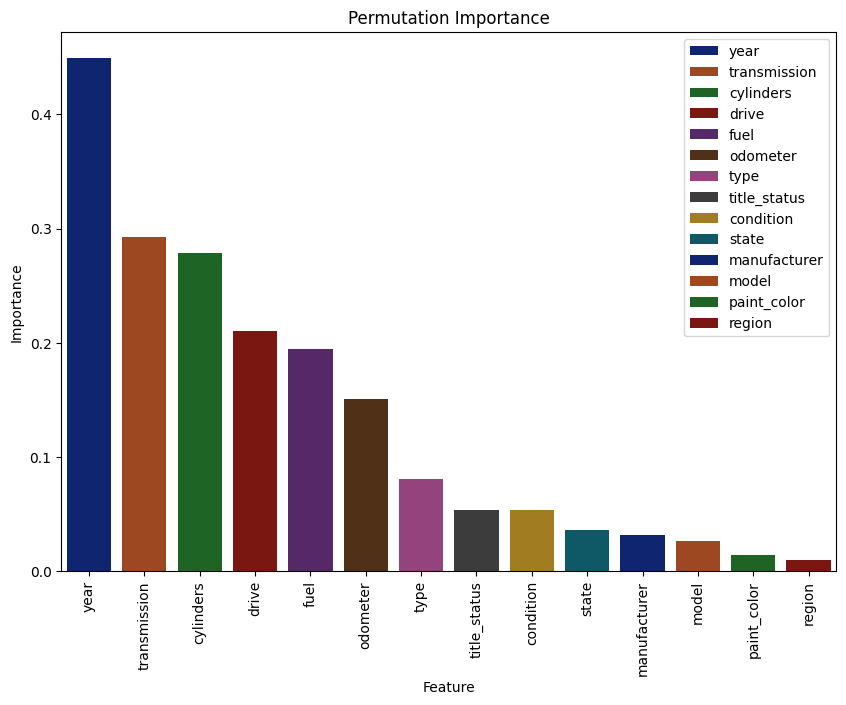

In [95]:
#draw plot of importance using sns
fig,ax = plt.subplots(figsize=(10,7))
fig = sns.barplot(x=importance_df.index, y=importance_df.Importance, ax=ax, palette='dark', hue=importance_df.index, legend= True)
ax.xaxis.set_ticks(ax.get_xticks()[::1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Permutation Importance')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.legend(loc='upper right')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
clean_vehicles.head()

region   price    year  manufacturer  model  condition  cylinders  fuel  \
0       7 4000.00 2002.00            34    791          0          3     2   
2       7 9000.00 2008.00            21   1604          0          3     2   
3       7 8950.00 2011.00            10    995          0          5     2   
6       7 9400.00 2008.00            22    365          2          5     2   
7       7 7300.00 2007.00            19   1944          2          5     2   

   odometer  title_status  transmission  drive  type  paint_color  state  
0 155000.00             0             0      1     9            1      1  
2  56700.00             0             0      2     2           10      1  
3 164000.00             0             0      1    10           10      1  
6 129473.00             0             0      2     9            9      1  
7 181000.00             0             0      1     0           10      1

In [ ]:
le_encorers['condition']

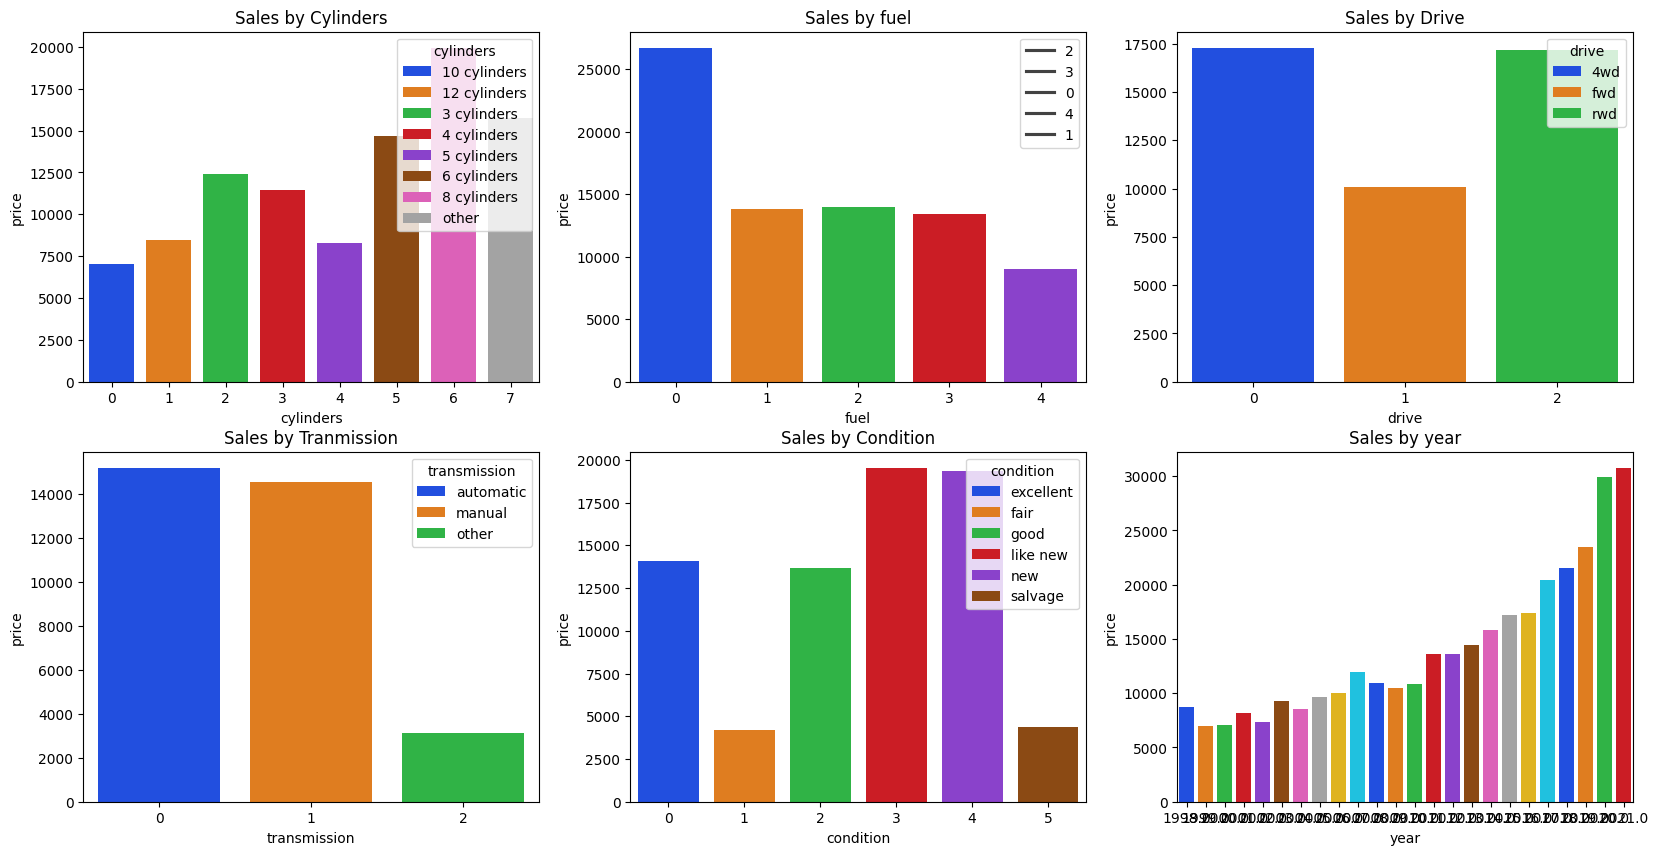

In [ ]:
# draw plots
fig, ax = plt.subplots(2,3, figsize=(20,10))
# sales by cylinders
vehicle_cylinders_price = clean_vehicles.groupby('cylinders')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_cylinders_price.index, y=vehicle_cylinders_price, ax=ax[0][0], hue=vehicle_cylinders_price.index, legend=True, palette='bright')
# Customize the legend
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles, labels=[le_encorers['cylinders'][int(label)] for label in labels], title='cylinders', loc='upper right')
fig.set_title('Sales by Cylinders')
# sales by fuel
vehicle_fuel_price = clean_vehicles.groupby('fuel')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_fuel_price.index, y=vehicle_fuel_price, ax=ax[0][1], hue=vehicle_fuel_price.index, legend=True, palette='bright')
# Customize the legend
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles, labels=[le_encorers['fuel'][int(label)] for label in labels], title='fuel', loc='upper right')
fig.set_title('Sales by fuel')
fig.legend(loc='upper right' ,labels = le_encorers['fuel'])
vehicle_drive_price = clean_vehicles.groupby('drive')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_drive_price.index, y=vehicle_drive_price, ax=ax[0][2], hue=vehicle_drive_price.index, legend=True, palette='bright')
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles, labels=[le_encorers['drive'][int(label)] for label in labels], title='drive', loc='upper right')
fig.set_title('Sales by Drive')
vehicle_transmission_price = clean_vehicles.groupby('transmission')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_transmission_price.index, y=vehicle_transmission_price, ax=ax[1][0], hue=vehicle_transmission_price.index, legend=True, palette='bright')
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles, labels=[le_encorers['transmission'][int(label)] for label in labels], title='transmission', loc='upper right')
fig.set_title('Sales by Tranmission')
vehicle_condition_price = clean_vehicles.groupby('condition')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_condition_price.index, y=vehicle_condition_price, ax=ax[1][1], hue=vehicle_condition_price.index, legend=True, palette='bright')
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles, labels=[le_encorers['condition'][int(label)] for label in labels], title='condition', loc='upper right')
fig.set_title('Sales by Condition')
vehicle_year_price = clean_vehicles.groupby('year')['price'].mean().sort_values(ascending=False)
fig = sns.barplot(x=vehicle_year_price.index, y=vehicle_year_price, ax=ax[1][2], hue=vehicle_year_price.index, legend=False, palette='bright')
fig.set_title('Sales by year')
plt.show()

In [ ]:
vehicle_year_price

year
2021.00   30718.41
2020.00   29886.81
2019.00   23470.95
2018.00   21575.70
2017.00   20400.08
2016.00   17373.19
2015.00   17241.70
2014.00   15845.99
2013.00   14480.95
2012.00   13643.43
2011.00   13594.42
2007.00   11999.22
2008.00   10942.84
2010.00   10876.57
2009.00   10488.93
2006.00   10051.03
2005.00    9679.76
2003.00    9255.86
1998.00    8709.86
2004.00    8521.86
2001.00    8202.36
2002.00    7328.33
2000.00    7085.58
1999.00    6975.24
Name: price, dtype: float64

In [ ]:
vehicle_year_agg_price = clean_vehicles[['year', 'price']].groupby('year').agg(sum)[['price']]

<ipython-input-84-ed0e4a39a177>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  vehicle_year_agg_price = clean_vehicles[['year', 'price']].groupby('year').agg(sum)[['price']]


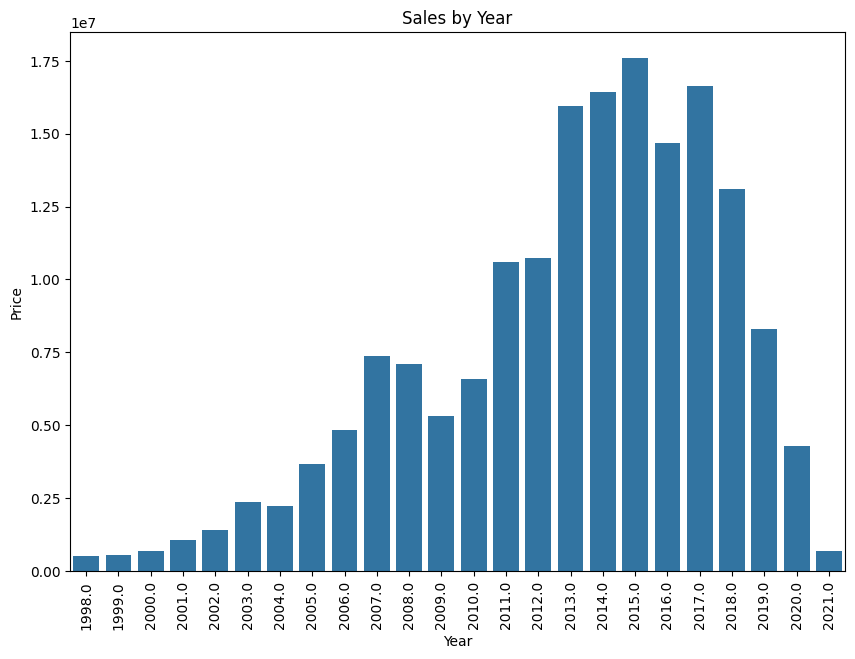

In [93]:
fig,ax = plt.subplots(figsize=(10,7))
fig = sns.barplot(x=vehicle_year_agg_price.index, y=vehicle_year_agg_price.price, ax=ax)
ax.xaxis.set_ticks(ax.get_xticks()[::1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#fig = sns.lineplot(x=vehicle_year_agg_price.index, y=vehicle_year_agg_price.price, ax=ax)
fig.set_title('Sales by Year')
fig.set_xlabel('Year')
fig.set_ylabel('Price')
plt.show()